### Kita import semua library yang akan kita butuhkan

In [1]:
!pip install joblib
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install xgboost
!pip install imblearn

In [2]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

c:\users\pandu\appdata\local\programs\python\python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Kita read data tersebut dan setelah itu tampilkan lima data teratas

In [3]:
df = pd.read_csv("./dataset_depresi.csv")
df.head()

,sex,Age,Married,education_level,incoming_business,depressed,Do you have part-time or full-time job?,Which of the following best describes your term-time accommodation?,How many hours do you spend studying each day?,"How many of the electronic gadgets (e.g. mobile phone, computer, laptop, PSP, PS4, Wii, etc.) do you have in your home or your student accommodation/mess/hall?",How many hours do you spend on social media per day?,family_history,treatment,work_interfere
0,1,28,1,10,0,0,Part time,Home (with parents),2 - 4 hours,4 - 6,More than 4 Hours,No,Yes,Often
1,1,23,1,8,0,1,Part time,University hall of residence,1 - 2 hours,1 - 3,1 - 2 Hours,No,No,Rarely
2,1,22,1,9,0,0,No,Home (with parents),1 - 2 hours,1 - 3,More than 4 Hours,No,No,Rarely
3,1,27,1,10,0,0,No,Home (with parents),1 - 2 hours,More than 6,2 - 4 Hours,Yes,Yes,Often
4,0,59,0,10,0,0,Part time,Home (with parents),1 - 2 hours,4 - 6,More than 4 Hours,No,No,Never


### Kita ubah kolom "depressed" ke urutan terakhir

In [4]:
df_depressed = df[["depressed"]]
df = df.drop(["depressed"], axis=1)
df[["depressed"]] = df_depressed
df.head()

,sex,Age,Married,education_level,incoming_business,Do you have part-time or full-time job?,Which of the following best describes your term-time accommodation?,How many hours do you spend studying each day?,"How many of the electronic gadgets (e.g. mobile phone, computer, laptop, PSP, PS4, Wii, etc.) do you have in your home or your student accommodation/mess/hall?",How many hours do you spend on social media per day?,family_history,treatment,work_interfere,depressed
0,1,28,1,10,0,Part time,Home (with parents),2 - 4 hours,4 - 6,More than 4 Hours,No,Yes,Often,0
1,1,23,1,8,0,Part time,University hall of residence,1 - 2 hours,1 - 3,1 - 2 Hours,No,No,Rarely,1
2,1,22,1,9,0,No,Home (with parents),1 - 2 hours,1 - 3,More than 4 Hours,No,No,Rarely,0
3,1,27,1,10,0,No,Home (with parents),1 - 2 hours,More than 6,2 - 4 Hours,Yes,Yes,Often,0
4,0,59,0,10,0,Part time,Home (with parents),1 - 2 hours,4 - 6,More than 4 Hours,No,No,Never,0


### Kita tampilkan info dari data tersebut

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 14 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                           --------------  ----- 
 0   sex                                                                                                                                                              1429 non-null   int64 
 1   Age                                                                                                                                                              1429 non-null   int64 
 2   Married                                                                                                                             

### Rubah tulisan kolom menjadi kecil semua dan hilangkan spasi di kanan dan kiri.

In [6]:
print("Sebelum dirubah:", df.columns)
df.columns = [column.lower().strip() for column in df.columns]
print("Setelah dirubah:", df.columns)

Sebelum dirubah: Index(['sex', 'Age', 'Married', 'education_level', 'incoming_business',
       'Do you have part-time or full-time job? ',
       'Which of the following best describes your term-time accommodation?',
       'How many hours do you spend studying each day?',
       'How many of the electronic gadgets (e.g. mobile phone, computer, laptop, PSP, PS4, Wii, etc.) do you have in your home or your student accommodation/mess/hall?',
       'How many hours do you spend on social media per day?',
       'family_history', 'treatment', 'work_interfere', 'depressed'],
      dtype='object')
Setelah dirubah: Index(['sex', 'age', 'married', 'education_level', 'incoming_business',
       'do you have part-time or full-time job?',
       'which of the following best describes your term-time accommodation?',
       'how many hours do you spend studying each day?',
       'how many of the electronic gadgets (e.g. mobile phone, computer, laptop, psp, ps4, wii, etc.) do you have in your home

### Kita lihat nilai unik dari setiap kolom pada data tersebut

In [7]:
for column in df.columns:
    if df[column].dtype == "object":
        print(f"Kolom '{column}': {df[column].unique()}")
    else:
        print(f"Kolom '{column}': {sorted(df[column].unique())}")

Kolom 'sex': [0, 1]
Kolom 'age': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 91]
Kolom 'married': [0, 1]
Kolom 'education_level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19]
Kolom 'incoming_business': [0, 1]
Kolom 'do you have part-time or full-time job?': ['Part time' 'No' 'Full time' 'Full Time' nan]
Kolom 'which of the following best describes your term-time accommodation?': ['Home (with parents)' 'University hall of residence'
 'Private rented accommodation' nan]
Kolom 'how many hours do you spend studying each day?': ['2 - 4 hours' '1 - 2 hours' 'More than 4 hours' nan]
Kolom 'how many of the electronic gadgets (e.g. mobile phone, computer, laptop, psp, ps4, wii, etc.) do you have in your home or your student accommodation/mess/

### Kita pisahkan antar kolom kategorikal dan numerikal

In [8]:
categorical_columns = [column for column in df.columns if df[column].dtype == 'object']
categorical_columns = ["sex", "married", "education_level", "incoming_business", "depressed", *categorical_columns]

numerical_columns =  ["age",]

### Kita lihat kesimpulan statistik dari data tersebut

In [9]:
df.describe()

,sex,age,married,education_level,incoming_business,depressed
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000
mean,0.918125,34.777467,0.772568,8.687194,0.107768,0.166550
std,0.274271,13.986219,0.419320,2.923532,0.310195,0.372704
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,25.000000,1.000000,8.000000,0.000000,0.000000
50%,1.000000,30.000000,1.000000,9.000000,0.000000,0.000000
75%,1.000000,42.000000,1.000000,10.000000,0.000000,0.000000
max,1.000000,91.000000,1.000000,19.000000,1.000000,1.000000


### Kita hapus yang memiliki nilai yang sama di baris tersebut

In [10]:
print("Sebelum dihapus:", df.shape[0])
df = df.drop_duplicates()
print("Setelah dihapus:", df.shape[0])

Sebelum dihapus: 1429
Setelah dihapus: 1325


### Kita ganti nilai kategorikal yang duplikat atau salah penamaan

In [11]:
print(f"Sebelum dirubah : {df['do you have part-time or full-time job?'].unique()}")
df['do you have part-time or full-time job?'] = df['do you have part-time or full-time job?'].map({
    'Full time': 'Full Time',
    "Part time": 'Part Time',
    "Full time ": 'Full Time',
    "No": 'No',
})
print(f"Setelah dirubah : {df['do you have part-time or full-time job?'].unique()}")

Sebelum dirubah : ['Part time' 'No' 'Full time' 'Full Time' nan]
Setelah dirubah : ['Part Time' 'No' 'Full Time' nan]


### Kita ubah data kategorikal dari dataframe menjadi data numerikal

In [12]:
categorical_columns_temp = [column for column in df.columns if df[column].dtype == 'object']
encoder = OrdinalEncoder()
df[categorical_columns_temp] = encoder.fit_transform(df[categorical_columns_temp])
df = df.astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 0 to 1428
Data columns (total 14 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                           --------------  -----  
 0   sex                                                                                                                                                              1325 non-null   float64
 1   age                                                                                                                                                              1325 non-null   float64
 2   married                                                                                                                         

### Kita lihat arti hasil konversi data kategorikal ke numerical

In [13]:
for column, values in zip(categorical_columns_temp, encoder.categories_,):
    for i, category in enumerate(values):
        print(f"Kategori untuk kolom '{column}' nilai '{i}' adalah {category}")
    print()

Kategori untuk kolom 'do you have part-time or full-time job?' nilai '0' adalah Full Time
Kategori untuk kolom 'do you have part-time or full-time job?' nilai '1' adalah No
Kategori untuk kolom 'do you have part-time or full-time job?' nilai '2' adalah Part Time
Kategori untuk kolom 'do you have part-time or full-time job?' nilai '3' adalah nan

Kategori untuk kolom 'which of the following best describes your term-time accommodation?' nilai '0' adalah Home (with parents)
Kategori untuk kolom 'which of the following best describes your term-time accommodation?' nilai '1' adalah Private rented accommodation
Kategori untuk kolom 'which of the following best describes your term-time accommodation?' nilai '2' adalah University hall of residence
Kategori untuk kolom 'which of the following best describes your term-time accommodation?' nilai '3' adalah nan

Kategori untuk kolom 'how many hours do you spend studying each day?' nilai '0' adalah 1 - 2 hours
Kategori untuk kolom 'how many hours d

### Kita lihat apakah ada data yang kosong

In [14]:
df.isna().sum()

sex                                                                                                                                                                   0
age                                                                                                                                                                   0
married                                                                                                                                                               0
education_level                                                                                                                                                       0
incoming_business                                                                                                                                                     0
do you have part-time or full-time job?                                                                                                                         

### Setelah itu kita isi data kosong tersebut dengan menggunakan KNN Imputer dan bulatkan nilai imputer untuk hasil kolom kategorikal

In [15]:
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
for column in categorical_columns:
    df[column] = df[column].round()
df.isna().sum()

sex                                                                                                                                                                0
age                                                                                                                                                                0
married                                                                                                                                                            0
education_level                                                                                                                                                    0
incoming_business                                                                                                                                                  0
do you have part-time or full-time job?                                                                                                                            0
which of t

### Kita lihat apakah ada outlier values untuk kolom numerikal

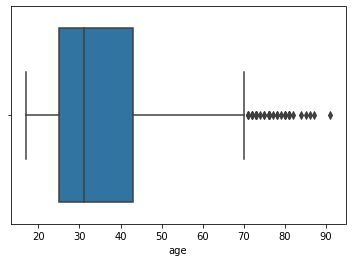

In [16]:
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

### Kita hapus outlier values tersebut dan kita cek hasilnya

Total data sebelum dihapus outliers:  1325
Total data sebelum dihapus outliers:  1283


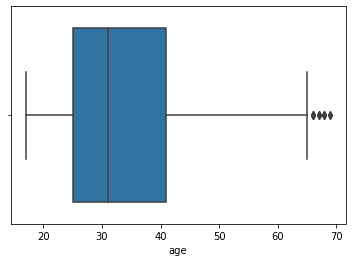

In [17]:
print("Total data sebelum dihapus outliers: ", df.shape[0])
for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    df = df.loc[(df[column] > fence_low) & (df[column] < fence_high)]
print("Total data sebelum dihapus outliers: ", df.shape[0])

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

### Kita lihat distribusi untuk setiap kolom kategorikal

     Total data  Persentase
1.0        1174        91.5
0.0         109         8.5



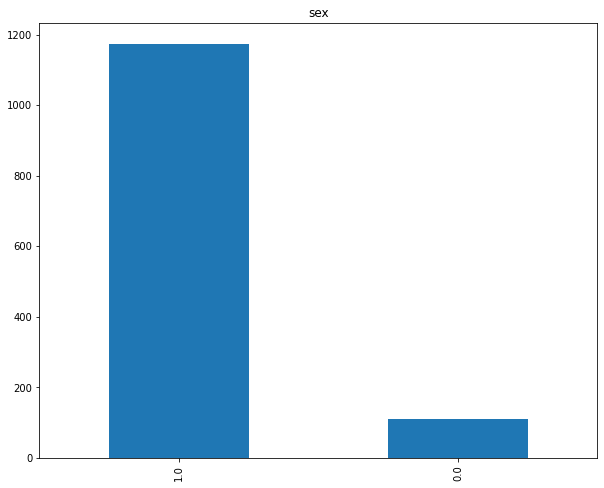

     Total data  Persentase
1.0         996        77.6
0.0         287        22.4



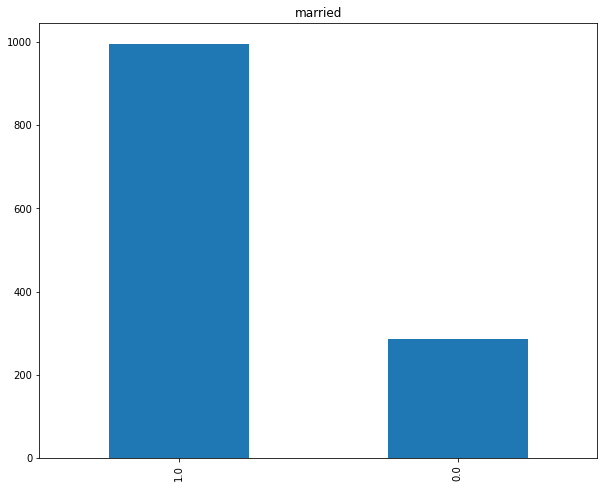

      Total data  Persentase
10.0         362        28.2
9.0          270        21.0
8.0          165        12.9
7.0           94         7.3
14.0          68         5.3
1.0           64         5.0
6.0           60         4.7
12.0          58         4.5
11.0          43         3.4
5.0           30         2.3
4.0           26         2.0
13.0          18         1.4
3.0           15         1.2
2.0            3         0.2
18.0           2         0.2
17.0           2         0.2
16.0           2         0.2
19.0           1         0.1



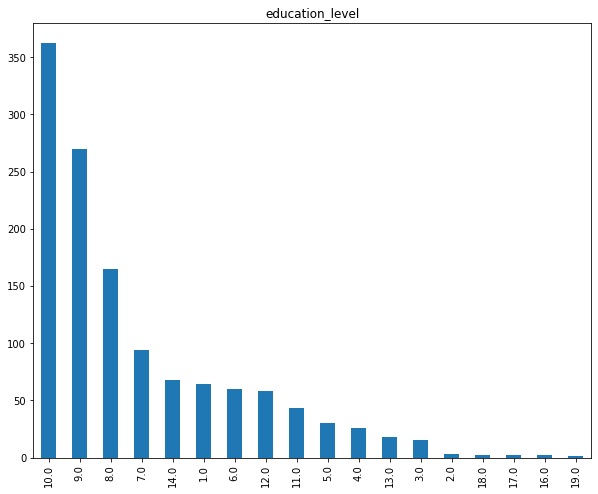

     Total data  Persentase
0.0        1134        88.4
1.0         149        11.6



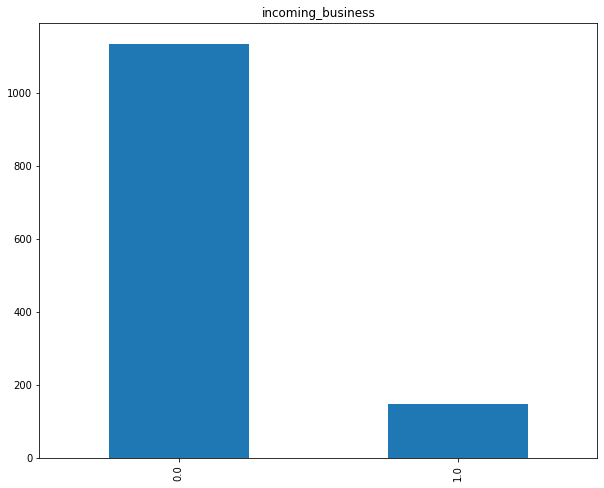

     Total data  Persentase
0.0        1063        82.9
1.0         220        17.1



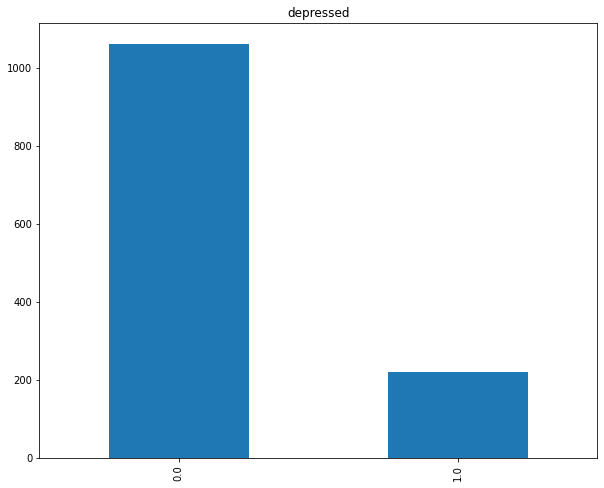

     Total data  Persentase
1.0         845        65.9
2.0         405        31.6
0.0          33         2.6



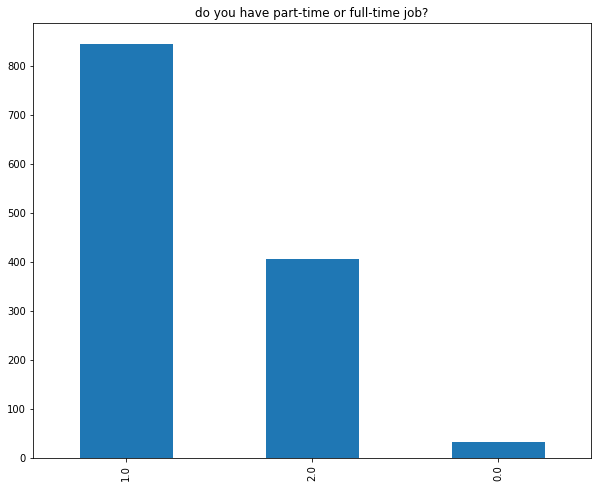

     Total data  Persentase
1.0         754        58.8
0.0         527        41.1
2.0           2         0.2



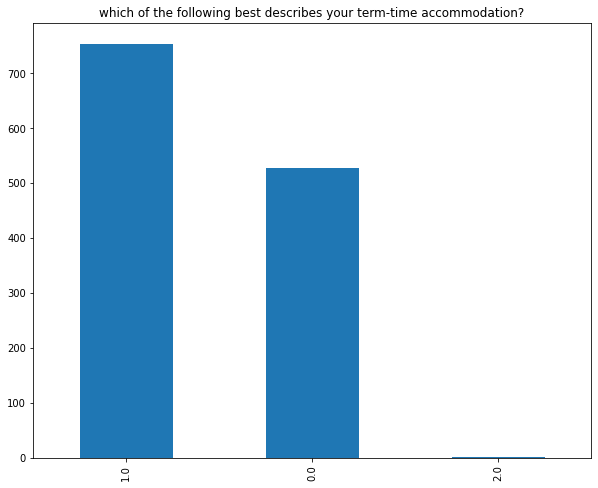

     Total data  Persentase
0.0         676        52.7
1.0         569        44.3
2.0          38         3.0



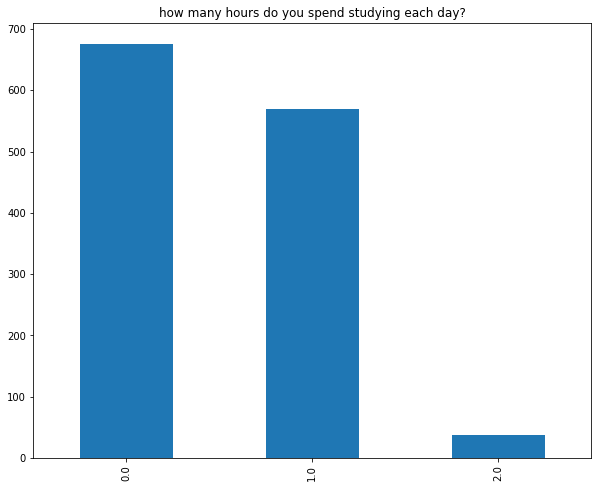

     Total data  Persentase
1.0         727        56.7
0.0         479        37.3
2.0          71         5.5
3.0           6         0.5



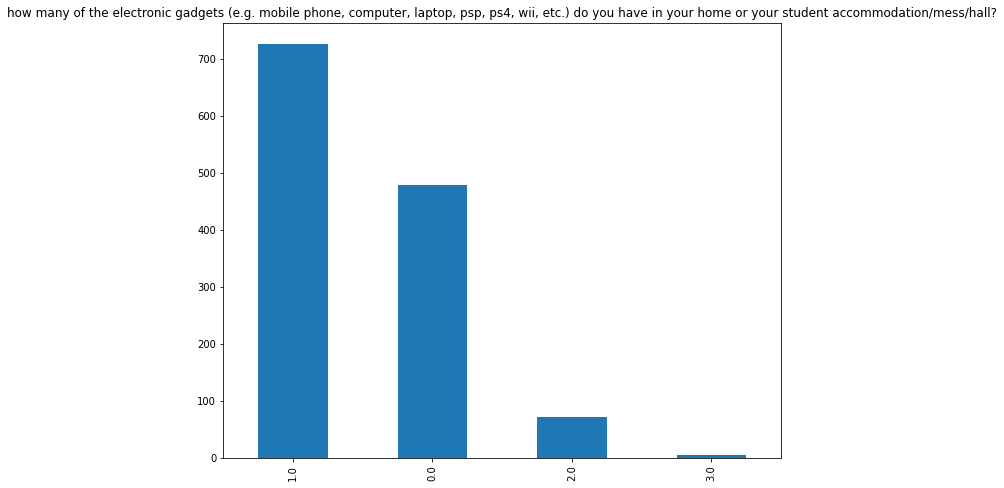

     Total data  Persentase
1.0         625        48.7
2.0         610        47.5
0.0          43         3.4
3.0           5         0.4



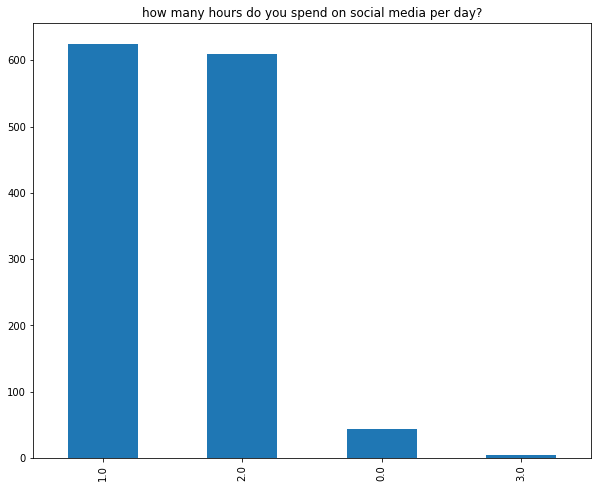

     Total data  Persentase
0.0         798        62.2
1.0         485        37.8



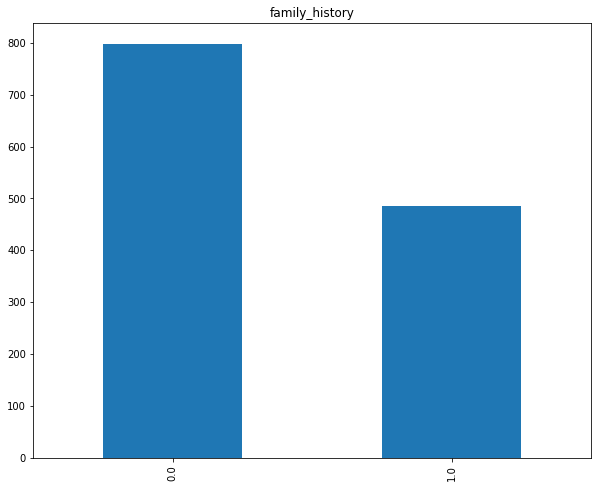

     Total data  Persentase
0.0         646        50.4
1.0         637        49.6



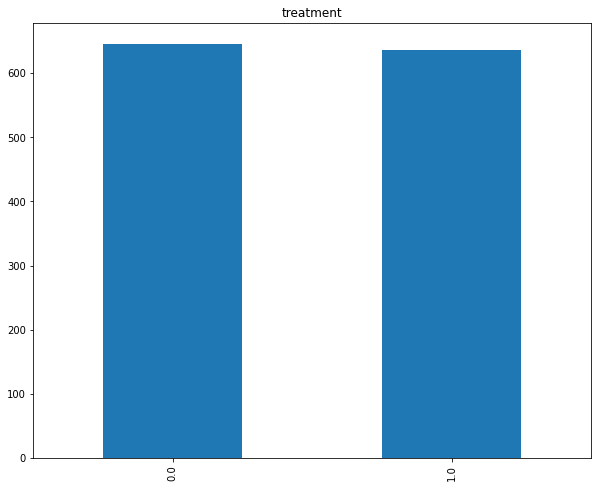

     Total data  Persentase
3.0         426        33.2
2.0         371        28.9
1.0         277        21.6
0.0         209        16.3



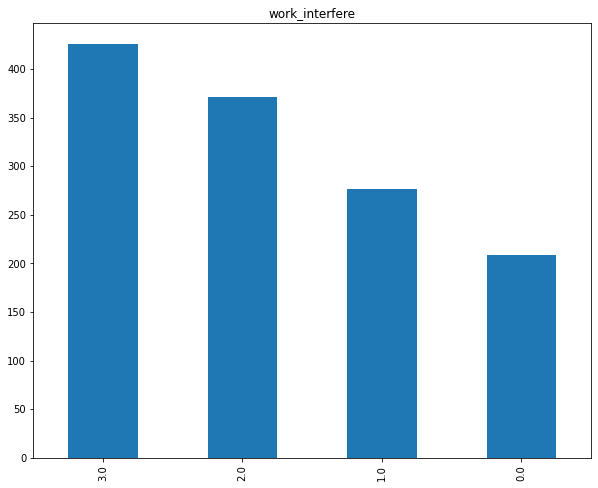

In [18]:
for column in categorical_columns:
    count = df[column].value_counts()
    percent = 100 * df[column].value_counts(normalize=True)
    df_temp = pd.DataFrame({'Total data': count, 'Persentase': percent.round(1)})
    print(df_temp, end="\n\n")
    plt.figure(figsize=(10, 8))
    count.plot(kind='bar', title=column)
    plt.show()

### Kita atasi imbalance data dengan menggunakan SMOTE

     Total data  Persentase
1.0        1947        91.6
0.0         179         8.4



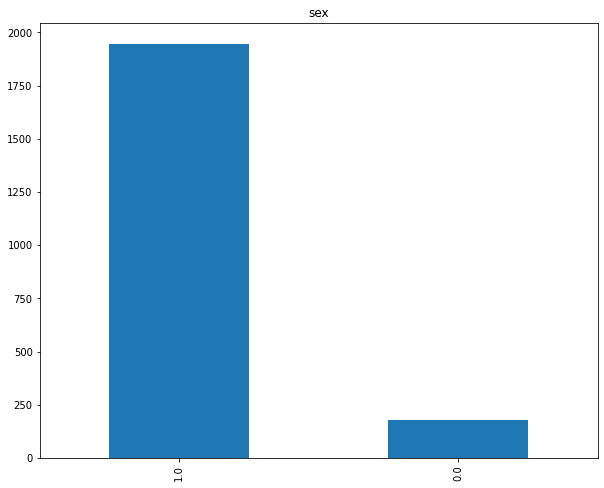

     Total data  Persentase
1.0        1628        76.6
0.0         498        23.4



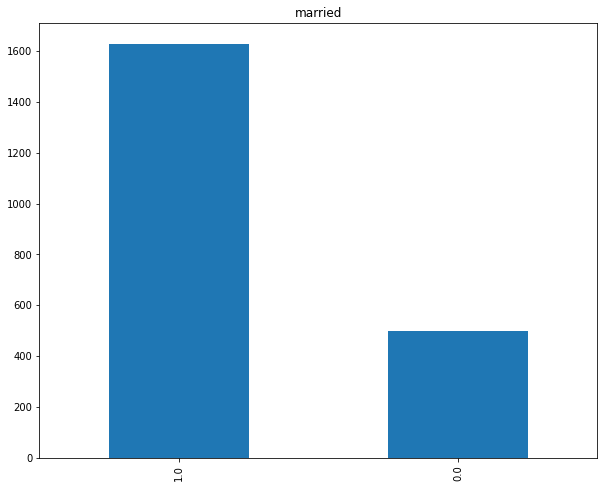

      Total data  Persentase
10.0         569        26.8
9.0          434        20.4
8.0          294        13.8
7.0          158         7.4
1.0          122         5.7
6.0          104         4.9
14.0          90         4.2
12.0          86         4.0
11.0          79         3.7
5.0           60         2.8
4.0           49         2.3
13.0          37         1.7
3.0           24         1.1
2.0           11         0.5
18.0           2         0.1
17.0           2         0.1
16.0           2         0.1
15.0           2         0.1
19.0           1         0.0



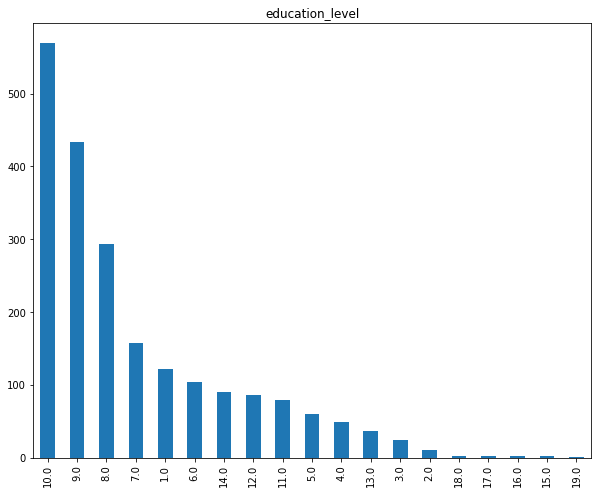

     Total data  Persentase
0.0        1903        89.5
1.0         223        10.5



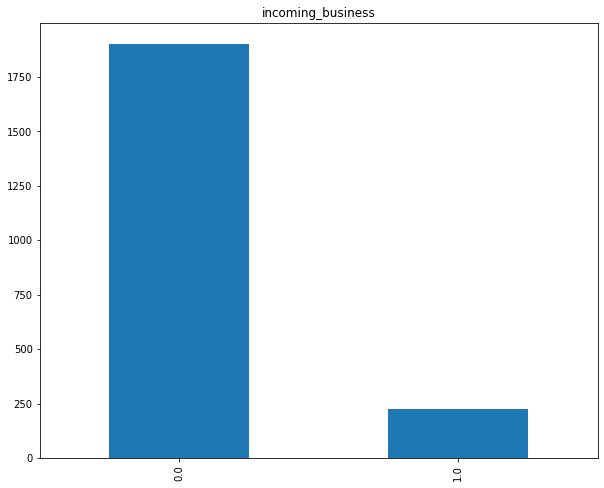

     Total data  Persentase
0.0        1063        50.0
1.0        1063        50.0



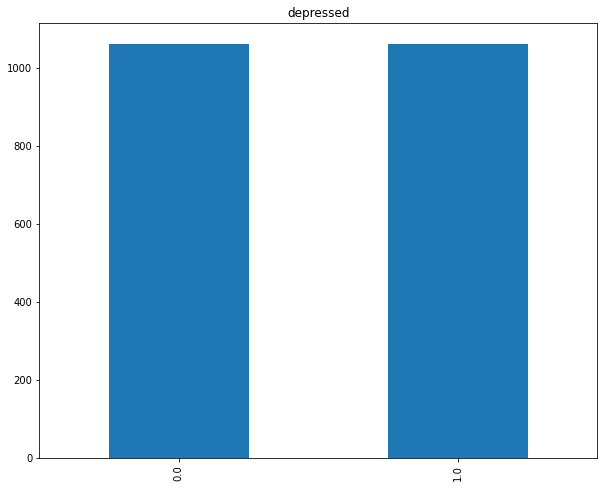

     Total data  Persentase
1.0        1422        66.9
2.0         653        30.7
0.0          51         2.4



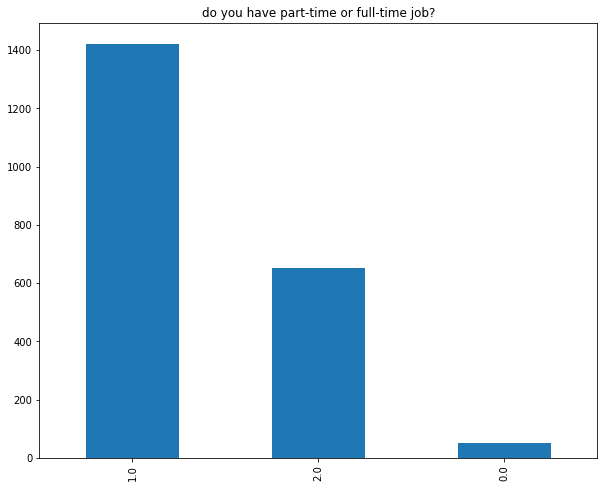

     Total data  Persentase
1.0        1275        60.0
0.0         845        39.7
2.0           6         0.3



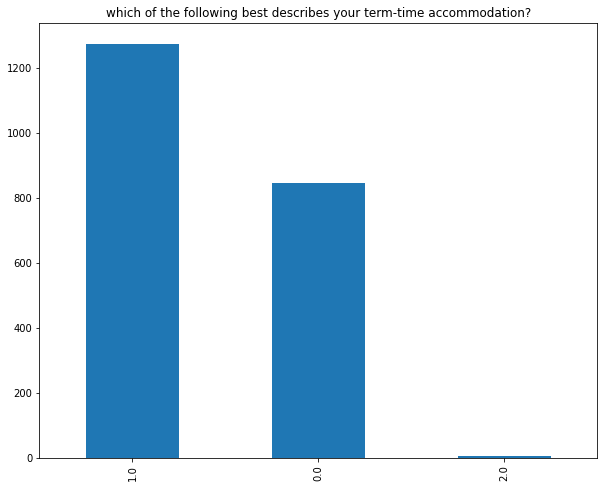

     Total data  Persentase
0.0        1095        51.5
1.0         973        45.8
2.0          58         2.7



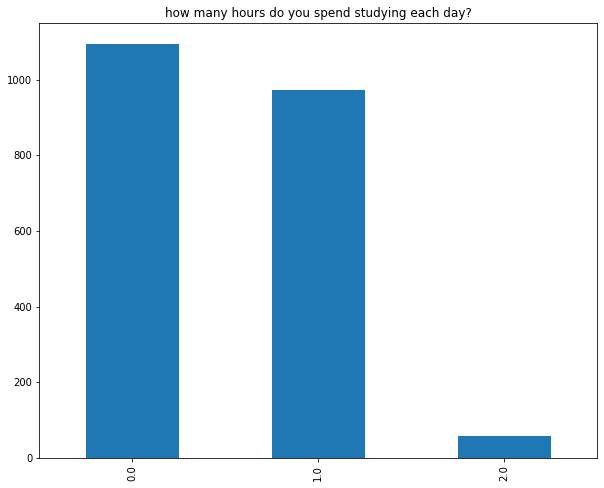

     Total data  Persentase
1.0        1223        57.5
0.0         803        37.8
2.0          94         4.4
3.0           6         0.3



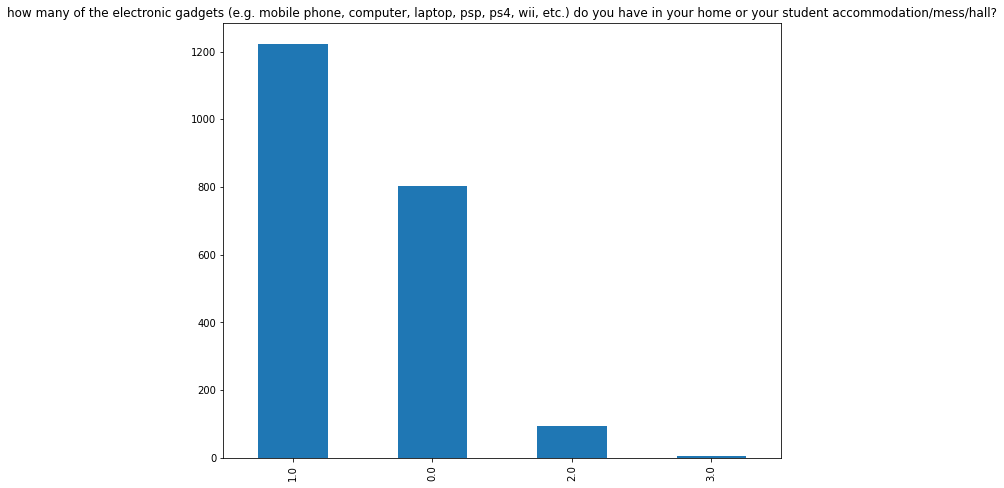

     Total data  Persentase
1.0        1067        50.2
2.0         989        46.5
0.0          63         3.0
3.0           7         0.3



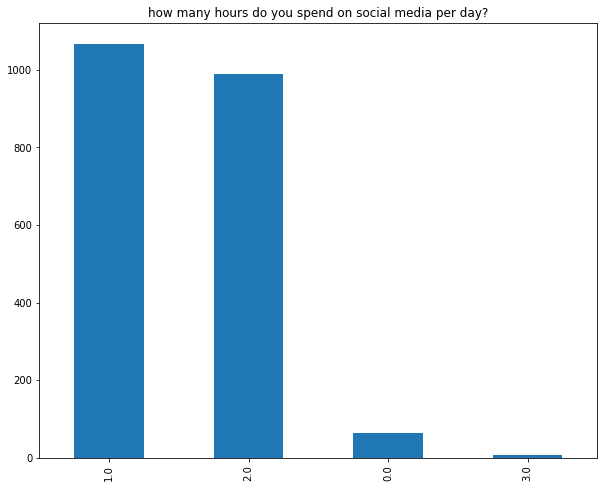

     Total data  Persentase
0.0        1312        61.7
1.0         814        38.3



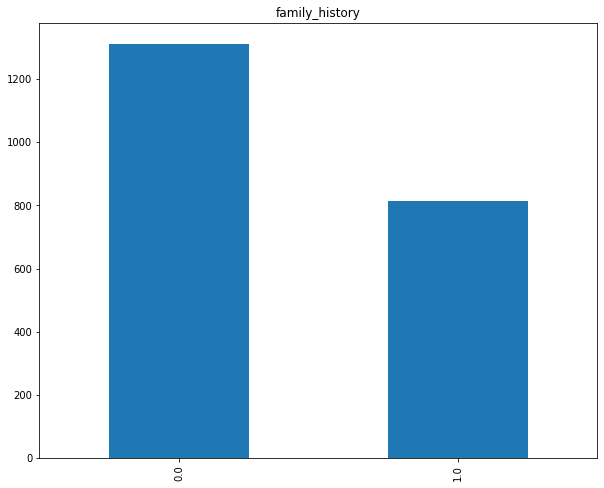

     Total data  Persentase
1.0        1101        51.8
0.0        1025        48.2



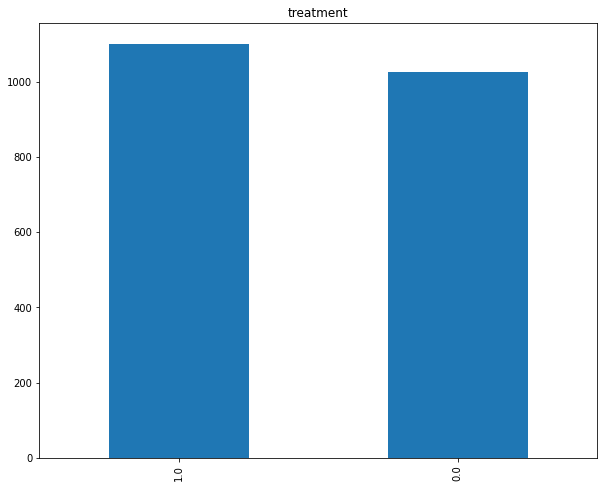

     Total data  Persentase
3.0         713        33.5
2.0         641        30.2
1.0         449        21.1
0.0         323        15.2



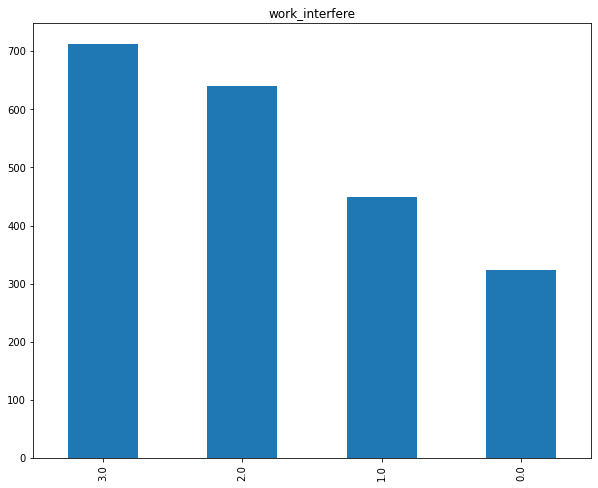

In [19]:
smote = SMOTE()
x = df.drop(["depressed"], axis=1)
y = df["depressed"]
x, y = smote.fit_resample(x, y)
df = x
df["depressed"] = y
for column in categorical_columns:
    df[column] = df[column].round()

for column in categorical_columns:
    count = df[column].value_counts()
    percent = 100 * df[column].value_counts(normalize=True)
    df_temp = pd.DataFrame({'Total data': count, 'Persentase': percent.round(1)})
    print(df_temp, end="\n\n")
    plt.figure(figsize=(10, 8))
    count.plot(kind='bar', title=column)
    plt.show()

### Kita lihat distribusi untuk setiap kolom numerikal

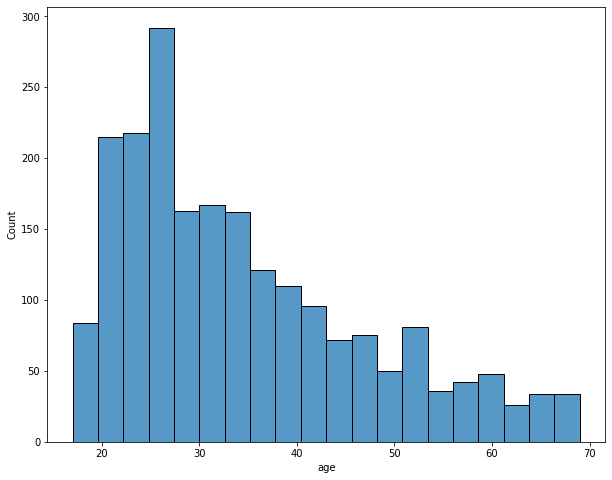

In [20]:
for column in numerical_columns:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[column])
    plt.show()

### Kita lihat distribusi data relatif terhadap kolom yang akan diprediksi

<Figure size 720x576 with 0 Axes>

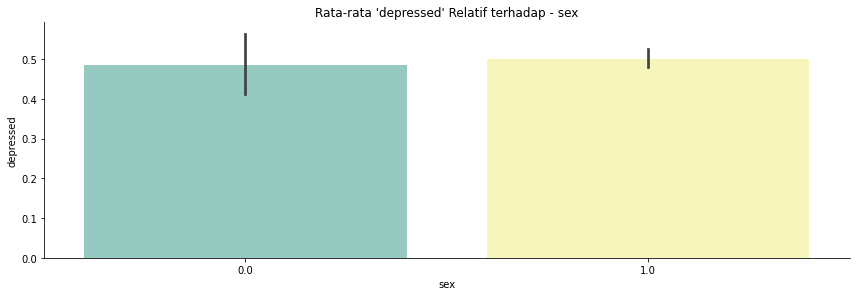

<Figure size 720x576 with 0 Axes>

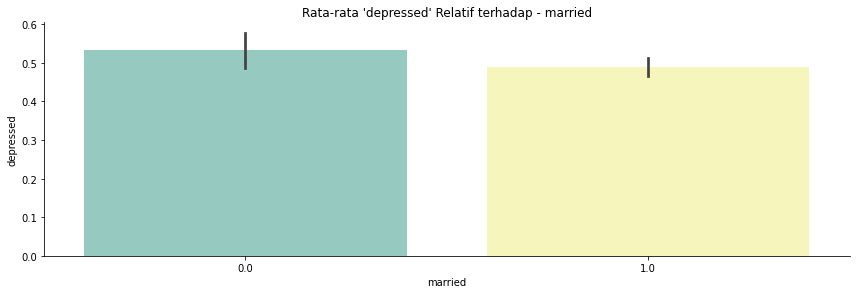

<Figure size 720x576 with 0 Axes>

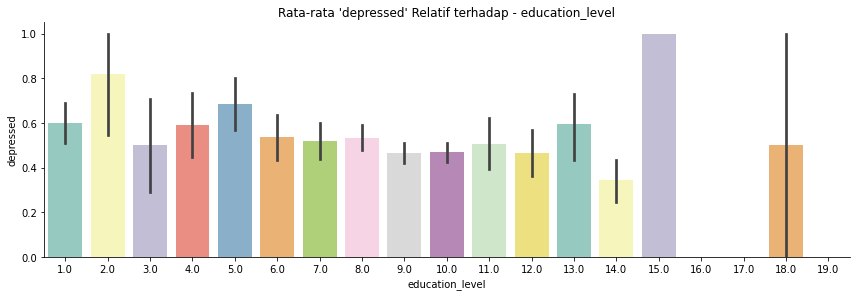

<Figure size 720x576 with 0 Axes>

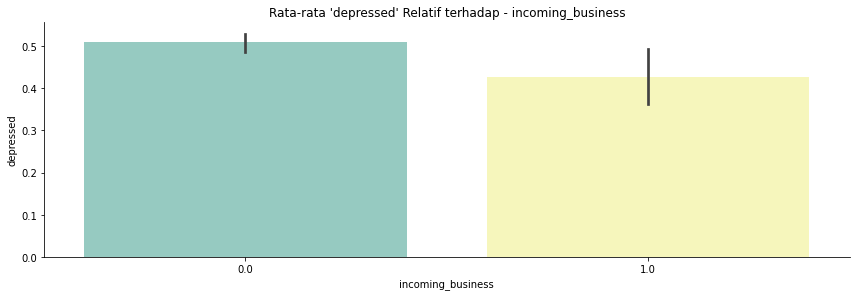

<Figure size 720x576 with 0 Axes>

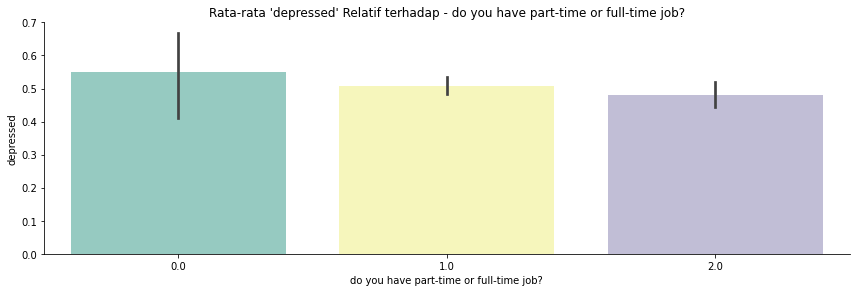

<Figure size 720x576 with 0 Axes>

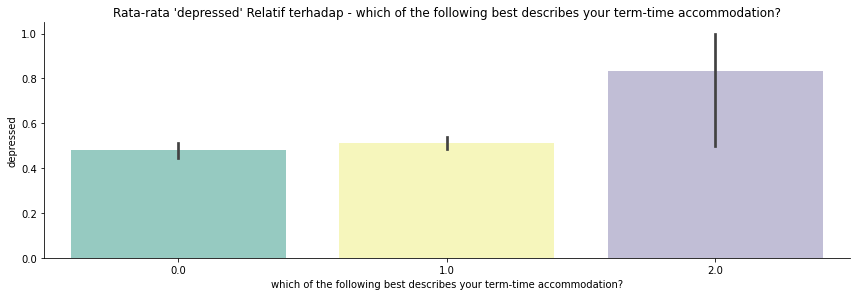

<Figure size 720x576 with 0 Axes>

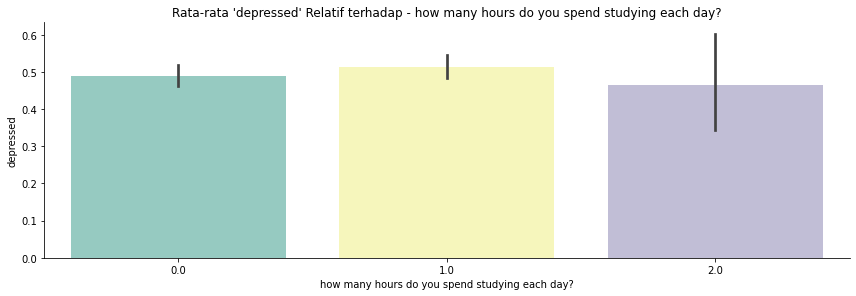

<Figure size 720x576 with 0 Axes>

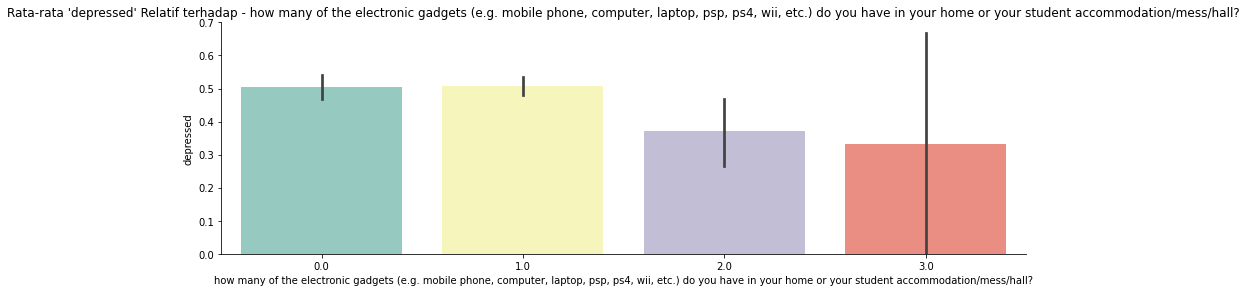

<Figure size 720x576 with 0 Axes>

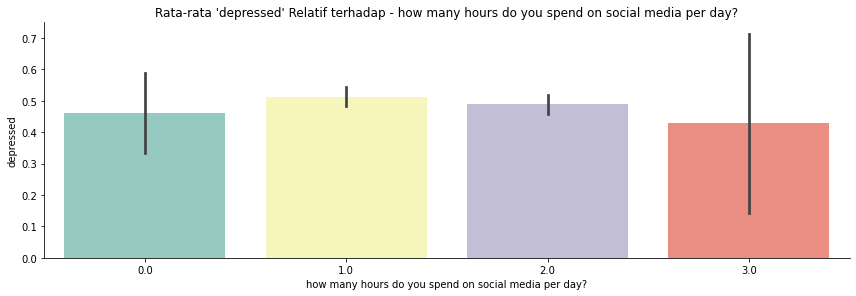

<Figure size 720x576 with 0 Axes>

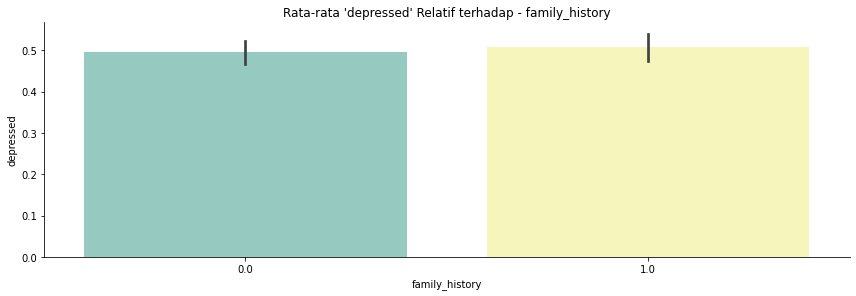

<Figure size 720x576 with 0 Axes>

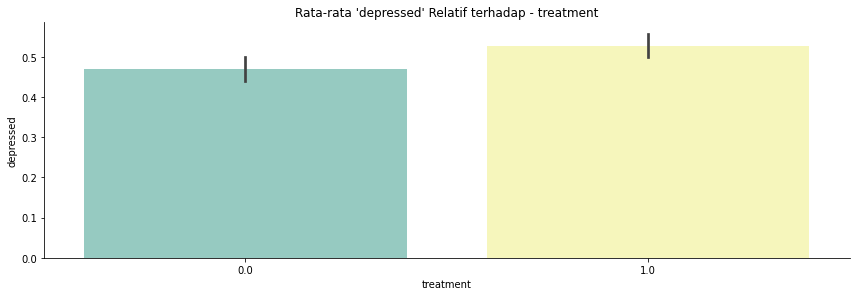

<Figure size 720x576 with 0 Axes>

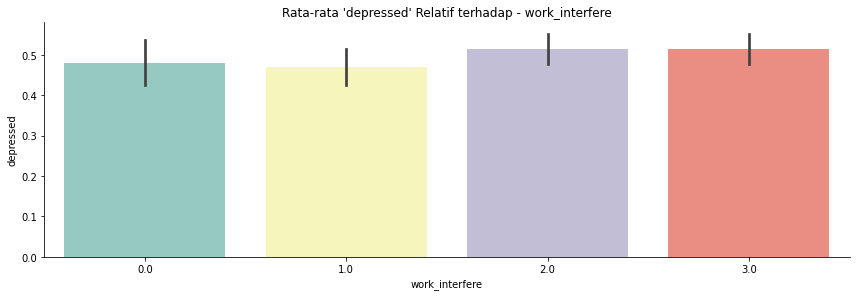

In [21]:
for column in categorical_columns:
  if column == "depressed":
    continue
  plt.figure(figsize=(10, 8))
  sns.catplot(x=column, y="depressed", kind="bar", dodge=False, height=4, aspect=3,  
              data=df, palette="Set3")
  plt.title("Rata-rata 'depressed' Relatif terhadap - {}".format(column))
  plt.show()

plt.show()

### Rubah nama kolom pada dataframe

In [22]:
sel_col = {'sex' : 'sex', \
           'age' : 'age', \
           'married' : 'married', \
           'do you have part-time or full-time job?': 'part_time', \
           'which of the following best describes your term-time accommodation?' : 'home', \
           'how many hours do you spend studying each day?' : 'study_time', \
           'how many of the electronic gadgets (e.g. mobile phone, computer, laptop, psp, ps4, wii, etc.) do you have in your home or your student accommodation/mess/hall?' : 'number_gadgets', \
           'how many hours do you spend on social media per day?' : 'socialmedia_time'}

df.rename(columns=sel_col, inplace=True)

In [23]:
df.columns

Index(['sex', 'age', 'married', 'education_level', 'incoming_business',
       'part_time', 'home', 'study_time', 'number_gadgets', 'socialmedia_time',
       'family_history', 'treatment', 'work_interfere', 'depressed'],
      dtype='object')

In [24]:
df.head()

,sex,age,married,education_level,incoming_business,part_time,home,study_time,number_gadgets,socialmedia_time,family_history,treatment,work_interfere,depressed
0,1.0,28.0,1.0,10.0,0.0,2.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0
1,1.0,23.0,1.0,8.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2,1.0,22.0,1.0,9.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
3,1.0,27.0,1.0,10.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0
4,0.0,59.0,0.0,10.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [25]:
for column in df:
    print(f'Kolom: {column}    Nilai: {df[column].unique()}')

Kolom: sex    Nilai: [1. 0.]
Kolom: age    Nilai: [28.         23.         22.         27.         59.         35.
 34.         21.         32.         29.         38.         56.
 24.         25.         44.         26.         40.         55.
 43.         51.         53.         36.         19.         31.
 41.         20.         18.         37.         33.         49.
 48.         42.         46.         30.         45.         52.
 39.         17.         57.         63.         62.         60.
 69.         47.         66.         65.         64.         54.
 68.         58.         67.         61.         50.         28.86331143
 24.4780584  28.47763967 25.81941302 21.46848944 50.06503152 48.8759034
 26.05030087 24.59799507 25.86928407 27.43121372 17.841187   46.68528264
 28.64403086 66.87845766 42.48482311 24.69062574 35.78772935 26.62283694
 32.08383522 27.37545287 53.68419244 30.93219436 24.88992551 39.82413415
 22.80375281 51.35988872 26.04288005 51.41675981 19.87407582 28.58

In [26]:
for column in df.columns:
    df[column] = df[column].astype(np.int32)

In [27]:
df.dtypes

sex                  int32
age                  int32
married              int32
education_level      int32
incoming_business    int32
part_time            int32
home                 int32
study_time           int32
number_gadgets       int32
socialmedia_time     int32
family_history       int32
treatment            int32
work_interfere       int32
depressed            int32
dtype: object

In [28]:
df

,sex,age,married,education_level,incoming_business,part_time,home,study_time,number_gadgets,socialmedia_time,family_history,treatment,work_interfere,depressed
0,1,28,1,10,0,2,0,1,1,2,0,1,1,0
1,1,23,1,8,0,2,2,0,0,0,0,0,2,1
2,1,22,1,9,0,1,0,0,0,2,0,0,2,0
3,1,27,1,10,0,1,0,0,2,1,1,1,1,0
4,0,59,0,10,0,2,0,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1,22,1,8,0,1,1,0,0,1,0,0,2,1
2122,1,52,1,9,0,2,0,1,0,2,1,0,2,1
2123,1,23,0,10,0,2,0,1,1,2,0,0,0,1
2124,1,43,1,9,0,1,0,1,1,1,0,1,3,1


### Kita lihat hubungan dari setiap data

<Figure size 720x576 with 0 Axes>

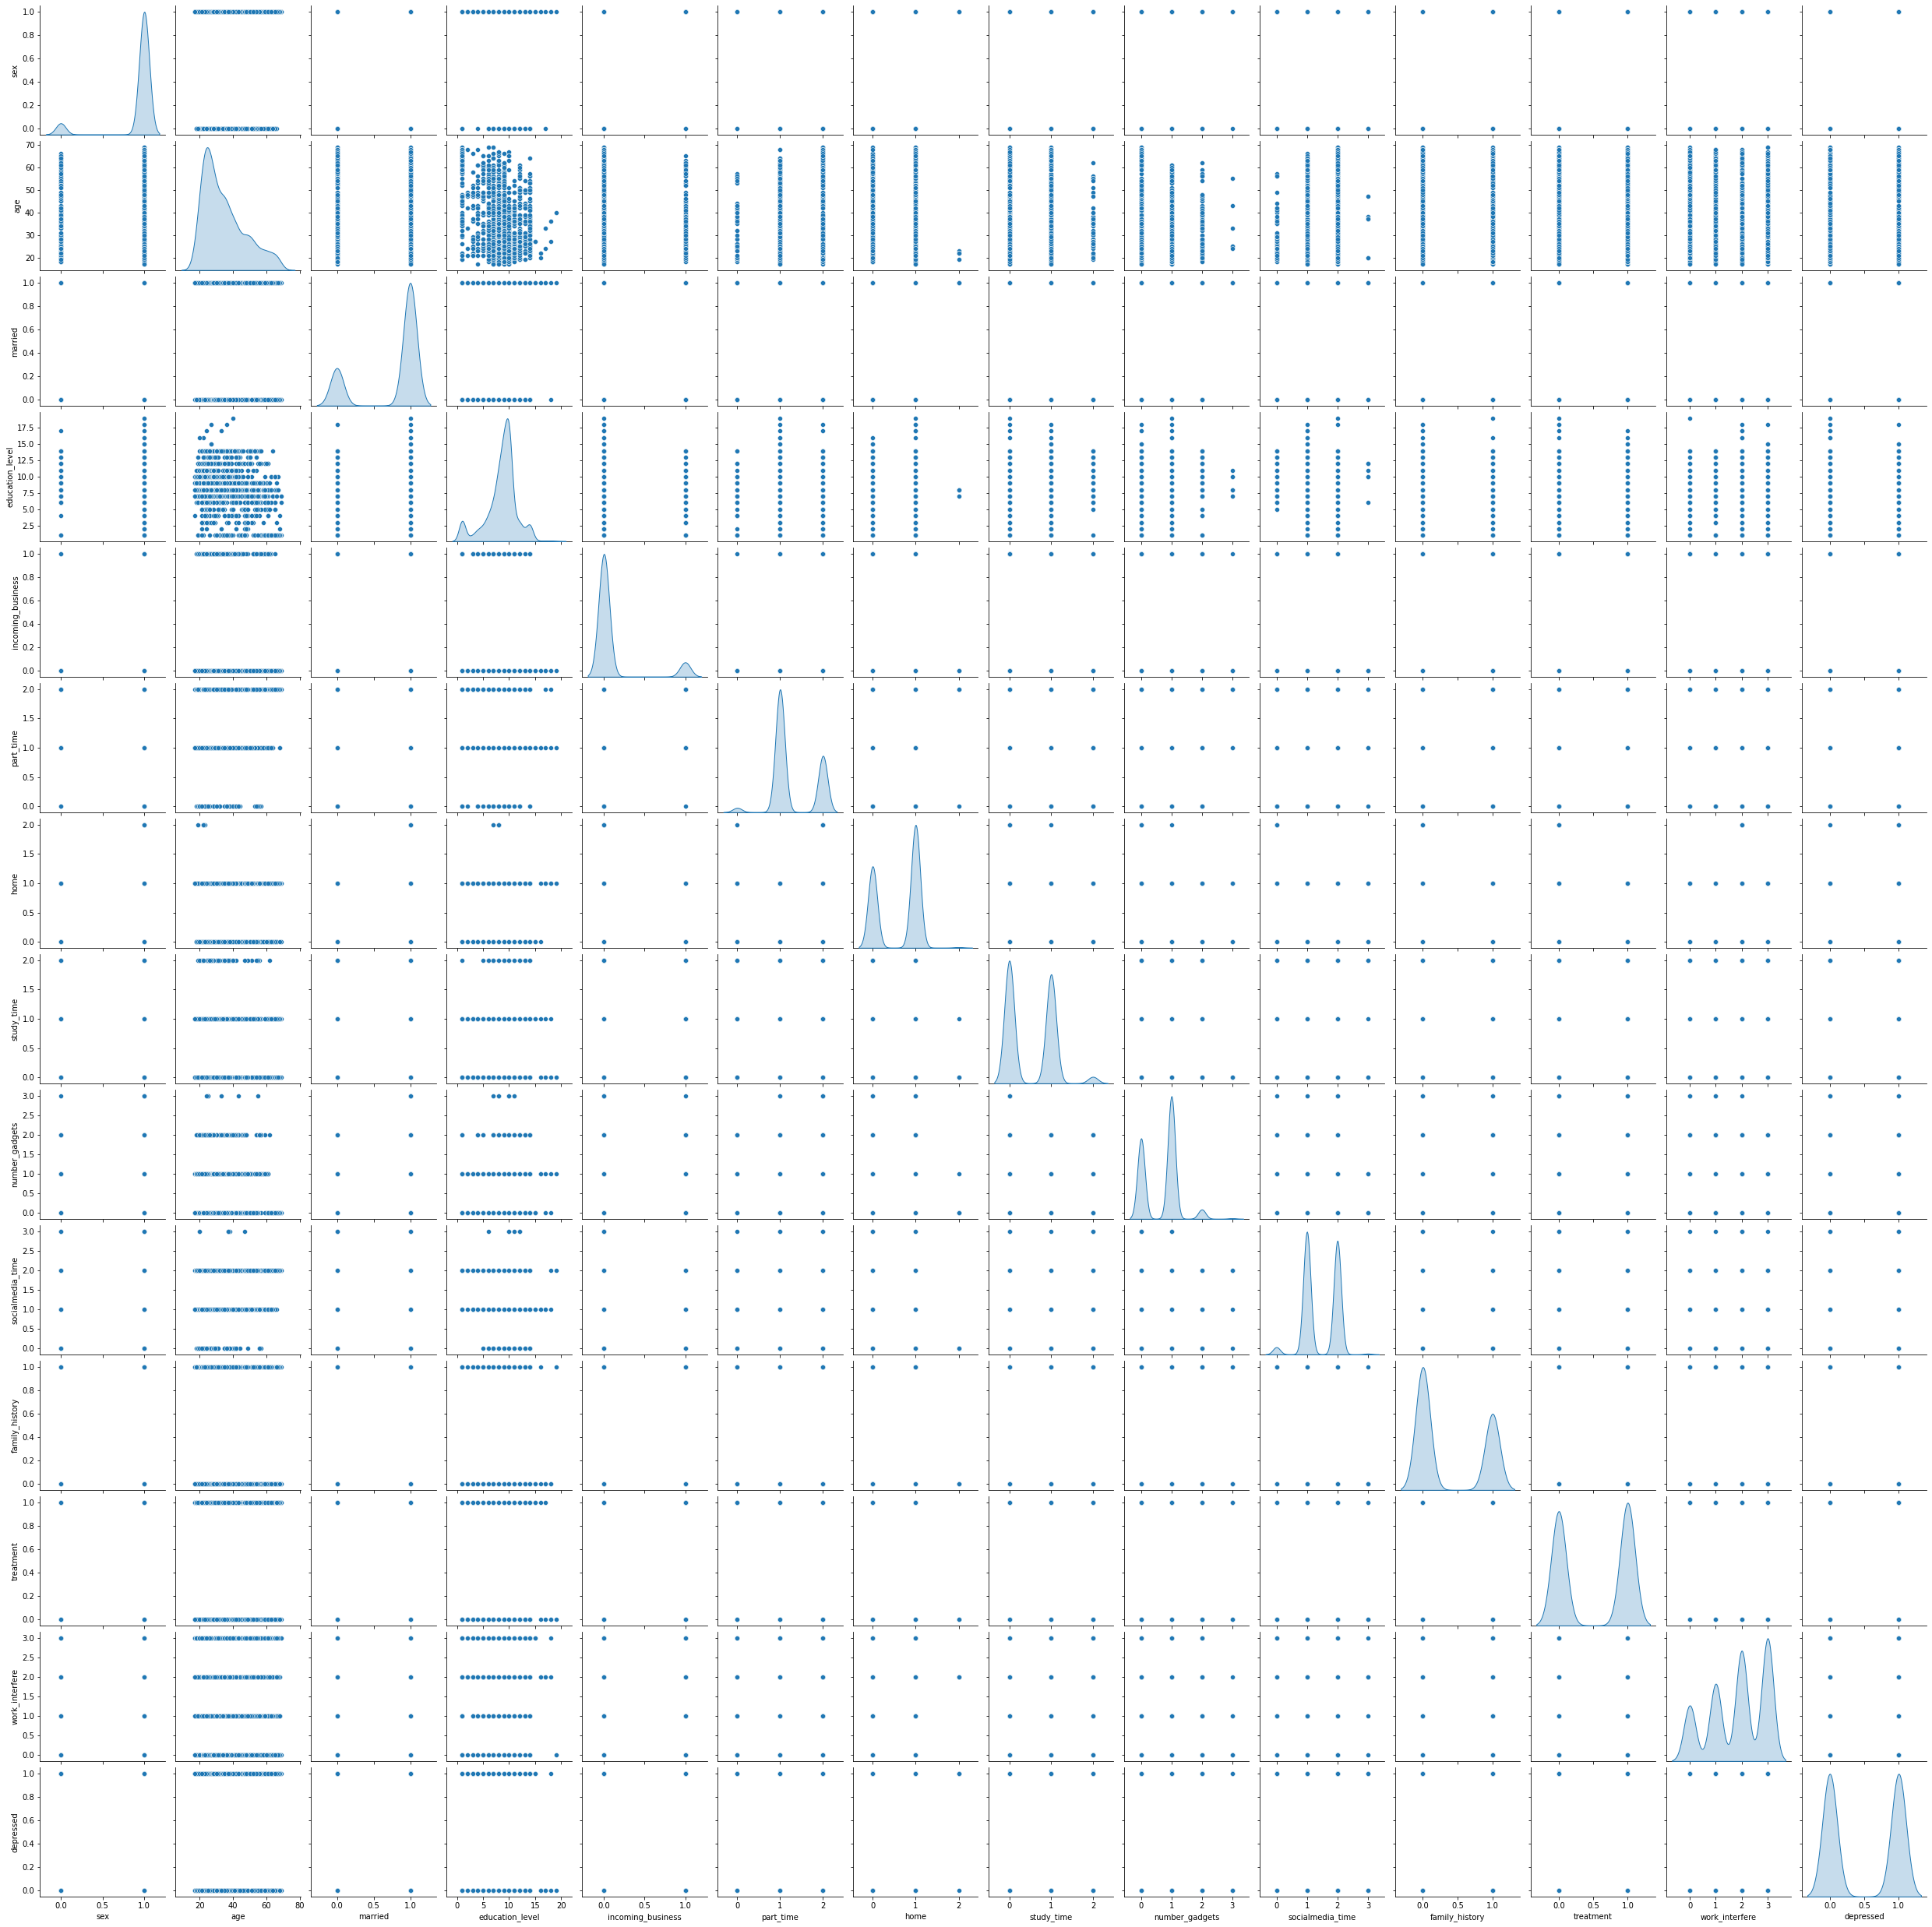

In [29]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, diag_kind="kde")
plt.show()

### Kita lihat korelasi antar setiap kolom

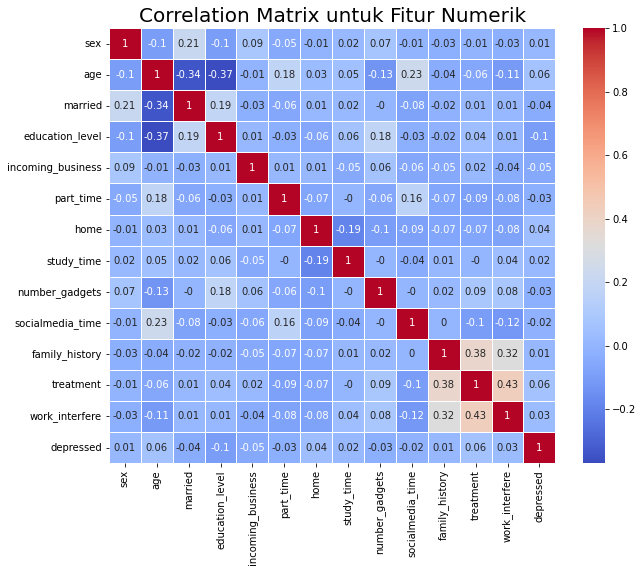

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

### Kita tampilkan visualisasi data tersebut ke dalam data 2 dimensi, untuk mengetahui persebaran data tersebut

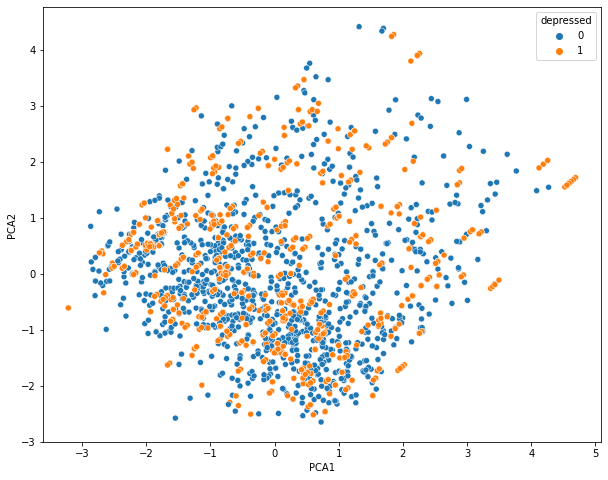

In [31]:
x = df.drop(columns=["depressed"])
y = df["depressed"]
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x)
pca_data = pd.DataFrame(data=pca_data, columns = ['PCA1', 'PCA2'])
pca_data = pd.concat([pca_data, df[['depressed']]], axis=1)

plt.figure(figsize=(10, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="depressed", data=pca_data)
plt.show()

### Kita pisahkan antara data x dan y dengan perbandingan data test 0.2%

In [32]:
x = df.drop(columns=["depressed"])
y = df["depressed"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 2126
Total # of sample in train dataset: 1700
Total # of sample in test dataset: 426


### Kita latih model tersebut dan standarisasi langsung

In [33]:
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])
svm.fit(x_train, y_train)

xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])
xgb.fit(x_train, y_train)

nb = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
nb.fit(x_train, y_train)

dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])
dt.fit(x_train, y_train)

knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn.fit(x_train, y_train)

lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])
lr.fit(x_train, y_train)

rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
rf.fit(x_train, y_train)

ab = Pipeline([
    ('scaler', StandardScaler()),
    ('ab', AdaBoostClassifier())
])
ab.fit(x_train, y_train)

print("Semua model berhasil dibuat")

c:\users\pandu\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Semua model berhasil dibuat


### Pada model SVM kita lihat hasil untuk data train tersebut

In [34]:
report_svm_train = classification_report(y_train, svm.predict(x_train), output_dict=True)
report_svm_train = pd.DataFrame(report_svm_train).transpose()
report_svm_train

,precision,recall,f1-score,support
0,0.792699,0.706977,0.747388,860.000000
1,0.729904,0.810714,0.768190,840.000000
accuracy,0.758235,0.758235,0.758235,0.758235
macro avg,0.761301,0.758846,0.757789,1700.000000
weighted avg,0.761671,0.758235,0.757666,1700.000000


### Pada model SVM kita lihat confusion matriks dari data train tersebut

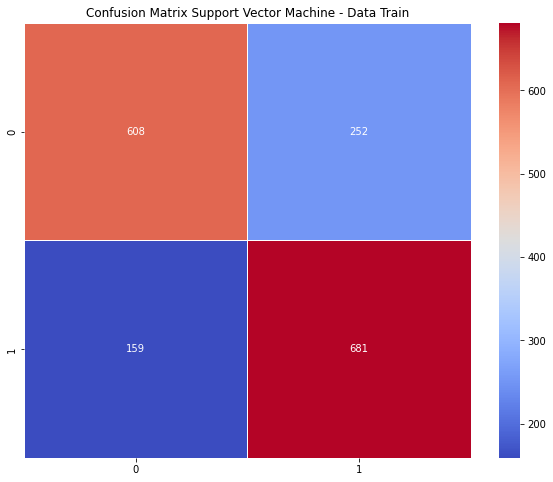

In [35]:
cm = confusion_matrix(y_train, svm.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Support Vector Machine - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model SVM kita lihat hasil untuk data test tersebut

In [36]:
report_svm_test = classification_report(y_test, svm.predict(x_test), output_dict=True)
report_svm_test = pd.DataFrame(report_svm_test).transpose()
report_svm_test

,precision,recall,f1-score,support
0,0.700535,0.645320,0.671795,203.000000
1,0.698745,0.748879,0.722944,223.000000
accuracy,0.699531,0.699531,0.699531,0.699531
macro avg,0.699640,0.697100,0.697369,426.000000
weighted avg,0.699598,0.699531,0.698570,426.000000


### Pada model SVM kita lihat confusion matriks dari data test tersebut

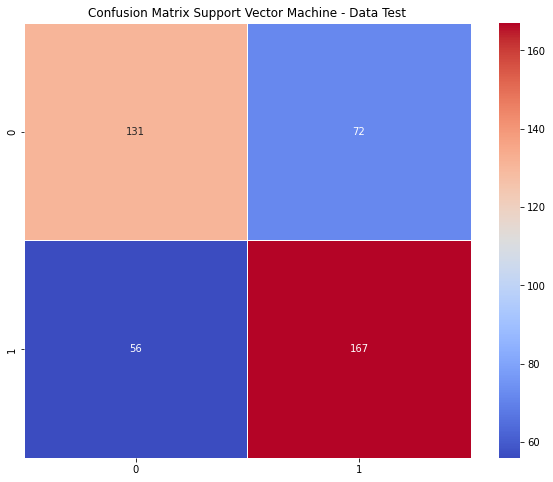

In [37]:
cm = confusion_matrix(y_test, svm.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Support Vector Machine - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model XGB kita lihat hasil untuk data train tersebut

In [38]:
report_xgb_train = classification_report(y_train, xgb.predict(x_train), output_dict=True)
report_xgb_train = pd.DataFrame(report_xgb_train).transpose()
report_xgb_train

,precision,recall,f1-score,support
0,0.989222,0.960465,0.974631,860.000000
1,0.960694,0.989286,0.974780,840.000000
accuracy,0.974706,0.974706,0.974706,0.974706
macro avg,0.974958,0.974875,0.974706,1700.000000
weighted avg,0.975125,0.974706,0.974705,1700.000000


### Pada model XGB kita lihat confusion matriks dari data train tersebut

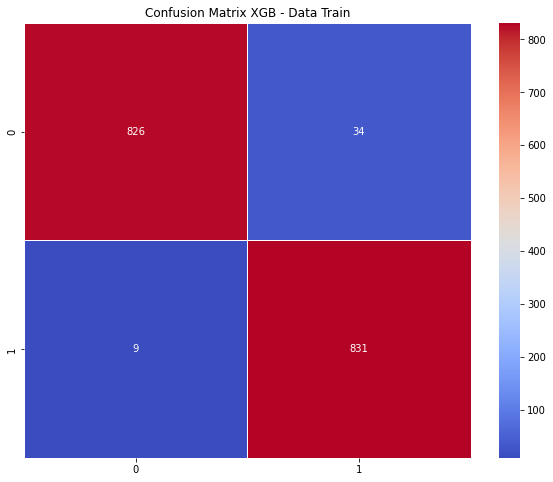

In [39]:
cm = confusion_matrix(y_train, xgb.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix XGB - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model XGB kita lihat hasil untuk data test tersebut

In [40]:
report_xgb_test = classification_report(y_test, xgb.predict(x_test), output_dict=True)
report_xgb_test = pd.DataFrame(report_xgb_test).transpose()
report_xgb_test

,precision,recall,f1-score,support
0,0.898305,0.783251,0.836842,203.00000
1,0.823293,0.919283,0.868644,223.00000
accuracy,0.854460,0.854460,0.854460,0.85446
macro avg,0.860799,0.851267,0.852743,426.00000
weighted avg,0.859038,0.854460,0.853490,426.00000


### Pada model XGB kita lihat confusion matriks dari data test tersebut

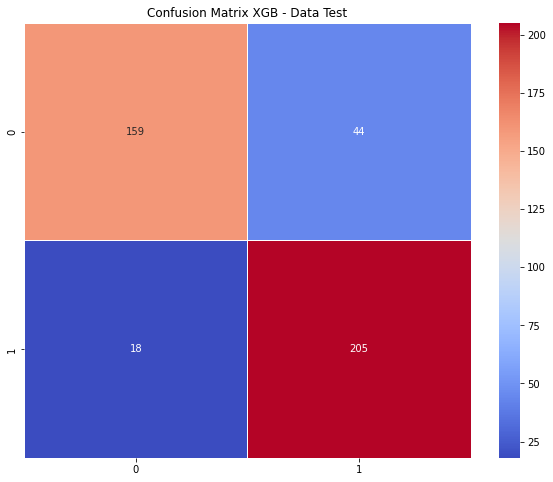

In [41]:
cm = confusion_matrix(y_test, xgb.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix XGB - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model NB kita lihat hasil untuk data train tersebut

In [42]:
report_nb_train = classification_report(y_train, nb.predict(x_train), output_dict=True)
report_nb_train = pd.DataFrame(report_nb_train).transpose()
report_nb_train

,precision,recall,f1-score,support
0,0.541975,0.510465,0.525749,860.000000
1,0.526966,0.558333,0.542197,840.000000
accuracy,0.534118,0.534118,0.534118,0.534118
macro avg,0.534471,0.534399,0.533973,1700.000000
weighted avg,0.534559,0.534118,0.533876,1700.000000


### Pada model NB kita lihat confusion matriks dari data train tersebut

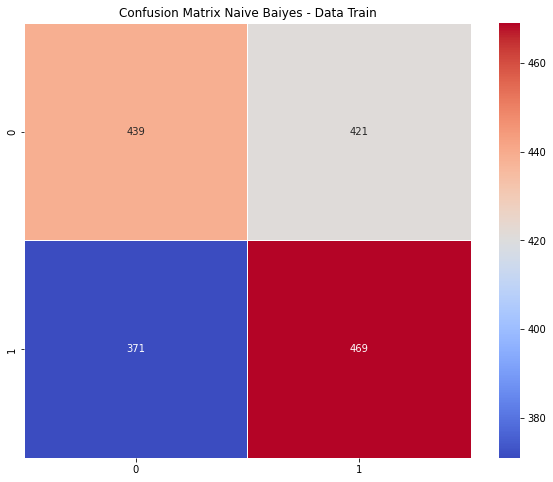

In [43]:
cm = confusion_matrix(y_train, nb.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Naive Baiyes - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model NB kita lihat hasil untuk data test tersebut

In [44]:
report_nb_test = classification_report(y_test, nb.predict(x_test), output_dict=True)
report_nb_test = pd.DataFrame(report_nb_test).transpose()
report_nb_test

,precision,recall,f1-score,support
0,0.525773,0.502463,0.513854,203.000000
1,0.564655,0.587444,0.575824,223.000000
accuracy,0.546948,0.546948,0.546948,0.546948
macro avg,0.545214,0.544954,0.544839,426.000000
weighted avg,0.546127,0.546948,0.546294,426.000000


### Pada model NB kita lihat confusion matriks dari data test tersebut

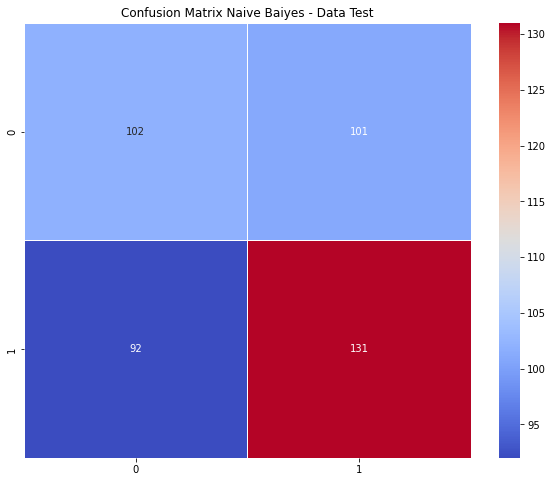

In [45]:
cm = confusion_matrix(y_test, nb.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Naive Baiyes - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()


### Pada model DT kita lihat hasil untuk data train tersebut

In [46]:
report_dt_train = classification_report(y_train, dt.predict(x_train), output_dict=True)
report_dt_train = pd.DataFrame(report_dt_train).transpose()
report_dt_train

,precision,recall,f1-score,support
0,0.994104,0.980233,0.987119,860.000000
1,0.980047,0.994048,0.986998,840.000000
accuracy,0.987059,0.987059,0.987059,0.987059
macro avg,0.987075,0.987140,0.987059,1700.000000
weighted avg,0.987158,0.987059,0.987059,1700.000000


### Pada model DT kita lihat confusion matriks dari data train tersebut

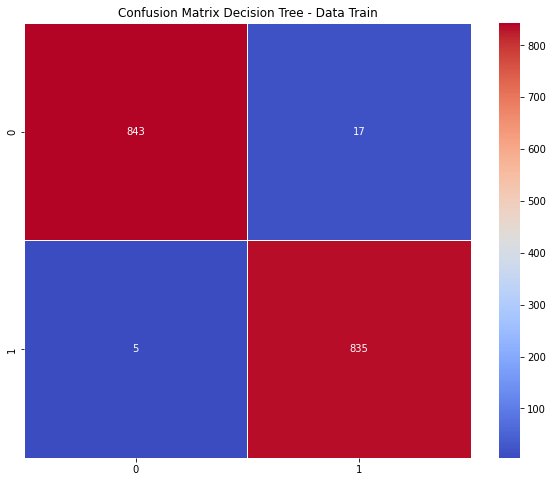

In [47]:
cm = confusion_matrix(y_train, dt.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Decision Tree - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model DT kita lihat hasil untuk data test tersebut

In [48]:
report_dt_test = classification_report(y_test, dt.predict(x_test), output_dict=True)
report_dt_test = pd.DataFrame(report_dt_test).transpose()
report_dt_test

,precision,recall,f1-score,support
0,0.910714,0.753695,0.824798,203.000000
1,0.806202,0.932735,0.864865,223.000000
accuracy,0.847418,0.847418,0.847418,0.847418
macro avg,0.858458,0.843215,0.844831,426.000000
weighted avg,0.856005,0.847418,0.845772,426.000000


### Pada model DT kita lihat confusion matriks dari data test tersebut

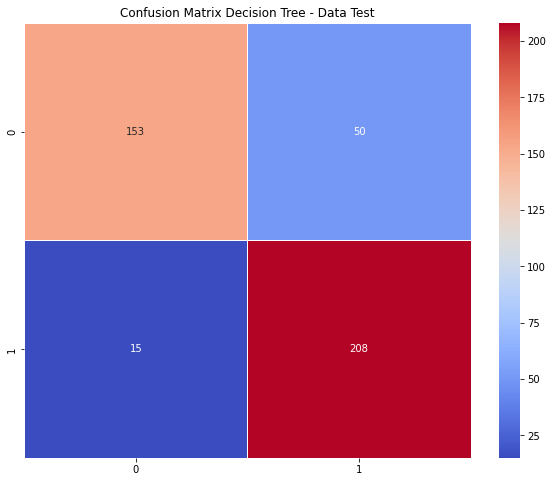

In [49]:
cm = confusion_matrix(y_test, dt.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Decision Tree - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model KNN kita lihat hasil untuk data train tersebut

In [50]:
report_knn_train = classification_report(y_train, knn.predict(x_train), output_dict=True)
report_knn_train = pd.DataFrame(report_knn_train).transpose()
report_knn_train

,precision,recall,f1-score,support
0,0.946578,0.659302,0.777245,860.000000
1,0.733878,0.961905,0.832561,840.000000
accuracy,0.808824,0.808824,0.808824,0.808824
macro avg,0.840228,0.810604,0.804903,1700.000000
weighted avg,0.841479,0.808824,0.804577,1700.000000


### Pada model KNN kita lihat confusion matriks dari data train tersebut

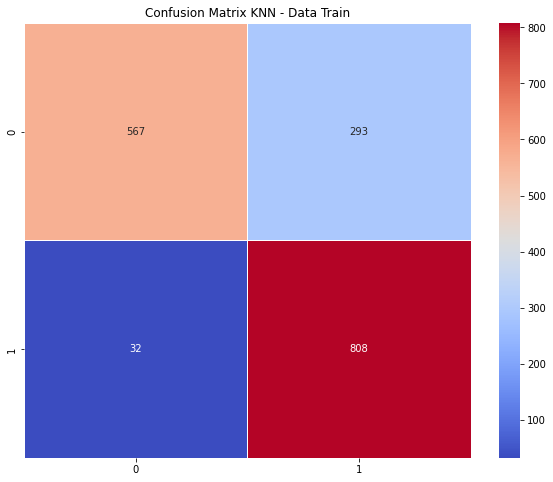

In [51]:
cm = confusion_matrix(y_train, knn.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix KNN - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model KNN kita lihat hasil untuk data test tersebut

In [52]:
report_knn_test = classification_report(y_test, knn.predict(x_test), output_dict=True)
report_knn_test = pd.DataFrame(report_knn_test).transpose()
report_knn_test

,precision,recall,f1-score,support
0,0.816176,0.546798,0.654867,203.000000
1,0.682759,0.887892,0.771930,223.000000
accuracy,0.725352,0.725352,0.725352,0.725352
macro avg,0.749468,0.717345,0.713399,426.000000
weighted avg,0.746336,0.725352,0.716146,426.000000


### Pada model KNN kita lihat confusion matriks dari data test tersebut

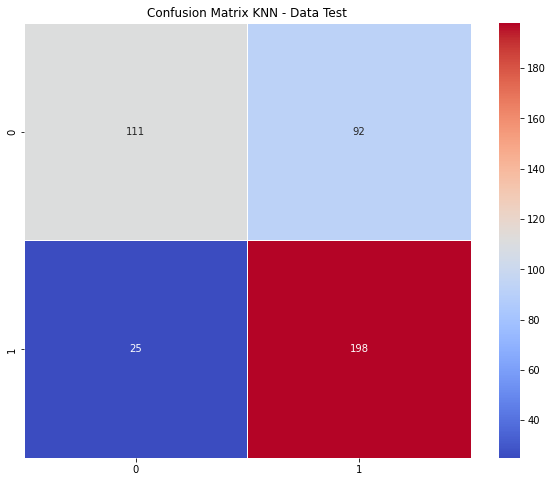

In [53]:
cm = confusion_matrix(y_test, knn.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix KNN - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model LR kita lihat hasil untuk data train tersebut

In [54]:
report_lr_train = classification_report(y_train, lr.predict(x_train), output_dict=True)
report_lr_train = pd.DataFrame(report_lr_train).transpose()
report_lr_train

,precision,recall,f1-score,support
0,0.549733,0.597674,0.572702,860.000000
1,0.547712,0.498810,0.522118,840.000000
accuracy,0.548824,0.548824,0.548824,0.548824
macro avg,0.548723,0.548242,0.547410,1700.000000
weighted avg,0.548734,0.548824,0.547708,1700.000000


### Pada model LR kita lihat confusion matriks dari data train tersebut

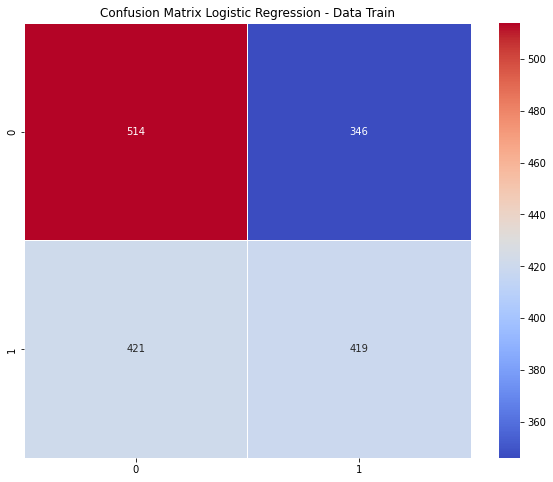

In [55]:
cm = confusion_matrix(y_train, lr.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Logistic Regression - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model LR kita lihat hasil untuk data test tersebut

In [56]:
report_lr_test = classification_report(y_test, lr.predict(x_test), output_dict=True)
report_lr_test = pd.DataFrame(report_lr_test).transpose()
report_lr_test

,precision,recall,f1-score,support
0,0.543860,0.610837,0.575406,203.000000
1,0.601010,0.533632,0.565321,223.000000
accuracy,0.570423,0.570423,0.570423,0.570423
macro avg,0.572435,0.572235,0.570363,426.000000
weighted avg,0.573776,0.570423,0.570127,426.000000


### Pada model LR kita lihat confusion matriks dari data test tersebut

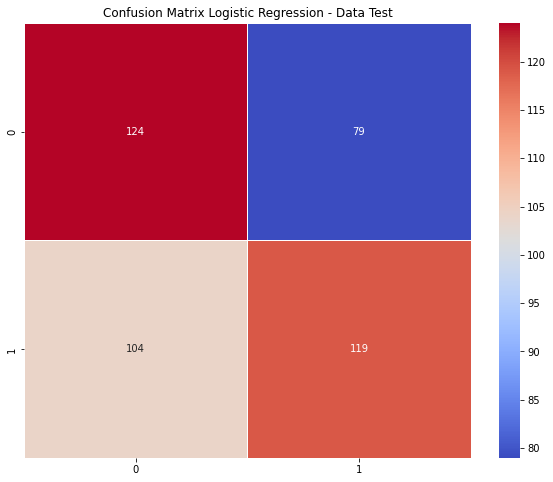

In [57]:
cm = confusion_matrix(y_test, lr.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Logistic Regression - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model RF kita lihat hasil untuk data train tersebut

In [58]:
report_rf_train = classification_report(y_train, rf.predict(x_train), output_dict=True)
report_rf_train = pd.DataFrame(report_rf_train).transpose()
report_rf_train

,precision,recall,f1-score,support
0,0.996445,0.977907,0.987089,860.000000
1,0.977804,0.996429,0.987028,840.000000
accuracy,0.987059,0.987059,0.987059,0.987059
macro avg,0.987125,0.987168,0.987059,1700.000000
weighted avg,0.987234,0.987059,0.987059,1700.000000


### Pada model RF kita lihat confusion matriks dari data train tersebut

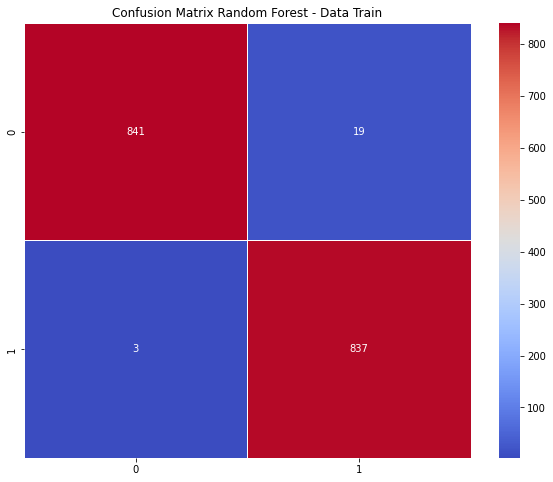

In [59]:
cm = confusion_matrix(y_train, rf.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Random Forest - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model RF kita lihat hasil untuk data test tersebut

In [60]:
report_rf_test = classification_report(y_test, rf.predict(x_test), output_dict=True)
report_rf_test = pd.DataFrame(report_rf_test).transpose()
report_rf_test

,precision,recall,f1-score,support
0,0.932990,0.891626,0.911839,203.00000
1,0.905172,0.941704,0.923077,223.00000
accuracy,0.917840,0.917840,0.917840,0.91784
macro avg,0.919081,0.916665,0.917458,426.00000
weighted avg,0.918428,0.917840,0.917722,426.00000


### Pada model RF kita lihat confusion matriks dari data test tersebut

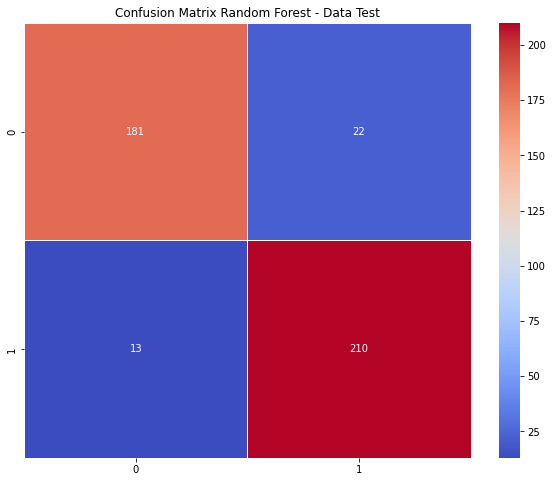

In [61]:
cm = confusion_matrix(y_test, rf.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Random Forest - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model AB kita lihat hasil untuk data train tersebut

In [62]:
report_ab_train = classification_report(y_train, ab.predict(x_train), output_dict=True)
report_ab_train = pd.DataFrame(report_ab_train).transpose()
report_ab_train

,precision,recall,f1-score,support
0,0.618312,0.604651,0.611405,860.000000
1,0.604191,0.617857,0.610948,840.000000
accuracy,0.611176,0.611176,0.611176,0.611176
macro avg,0.611251,0.611254,0.611176,1700.000000
weighted avg,0.611334,0.611176,0.611179,1700.000000


### Pada model AB kita lihat confusion matriks dari data train tersebut

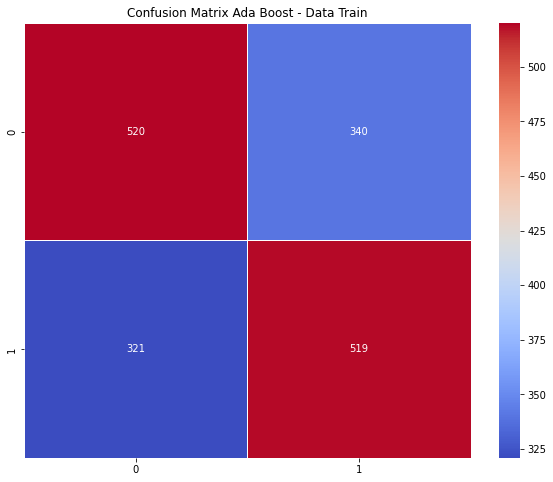

In [63]:
cm = confusion_matrix(y_train, ab.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Ada Boost - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model AB kita lihat hasil untuk data test tersebut

In [64]:
report_ab_test = classification_report(y_test, ab.predict(x_test), output_dict=True)
report_ab_test = pd.DataFrame(report_ab_test).transpose()
report_ab_test

,precision,recall,f1-score,support
0,0.572115,0.586207,0.579075,203.000000
1,0.614679,0.600897,0.607710,223.000000
accuracy,0.593897,0.593897,0.593897,0.593897
macro avg,0.593397,0.593552,0.593393,426.000000
weighted avg,0.594396,0.593897,0.594065,426.000000


### Pada model AB kita lihat confusion matriks dari data test tersebut

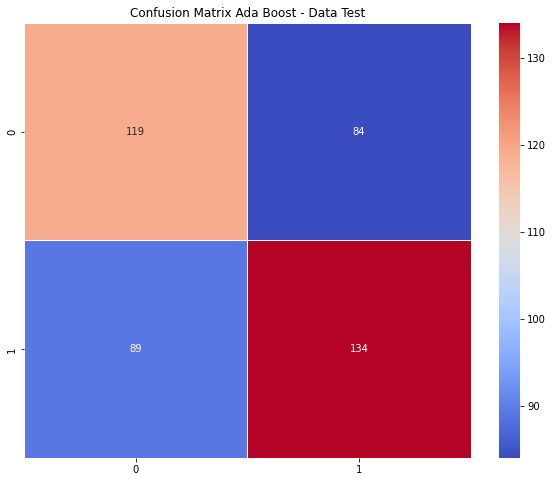

In [65]:
cm = confusion_matrix(y_test, ab.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Ada Boost - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Kita plot hasil dari setiap model tersebut dengan bar plot

<Figure size 720x576 with 0 Axes>

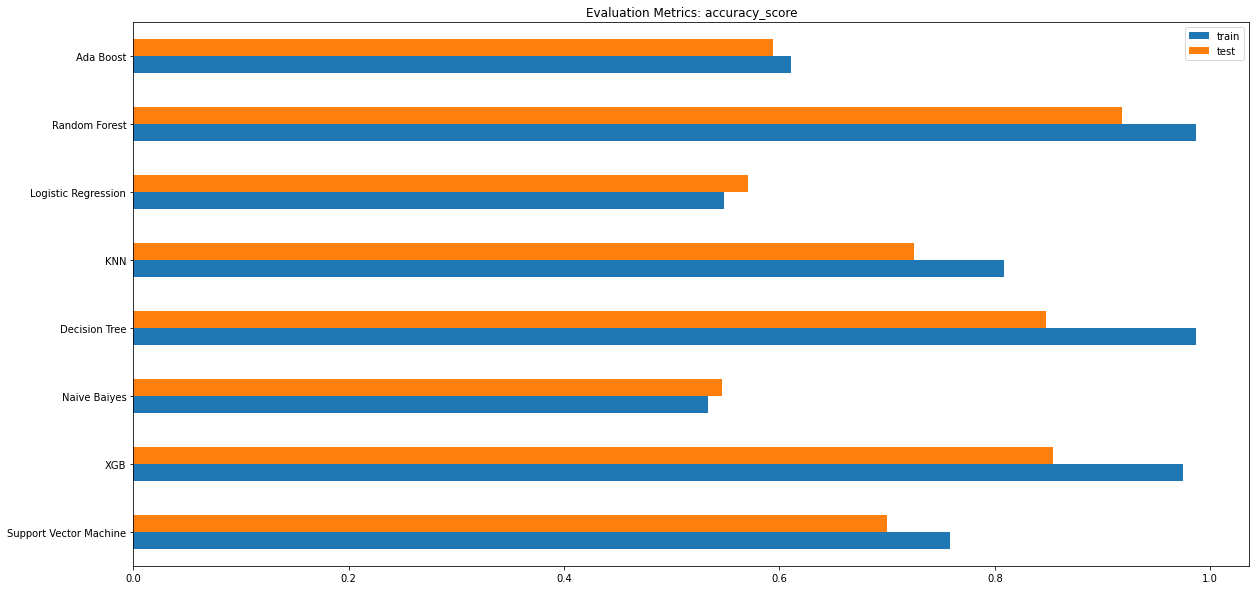

<Figure size 720x576 with 0 Axes>

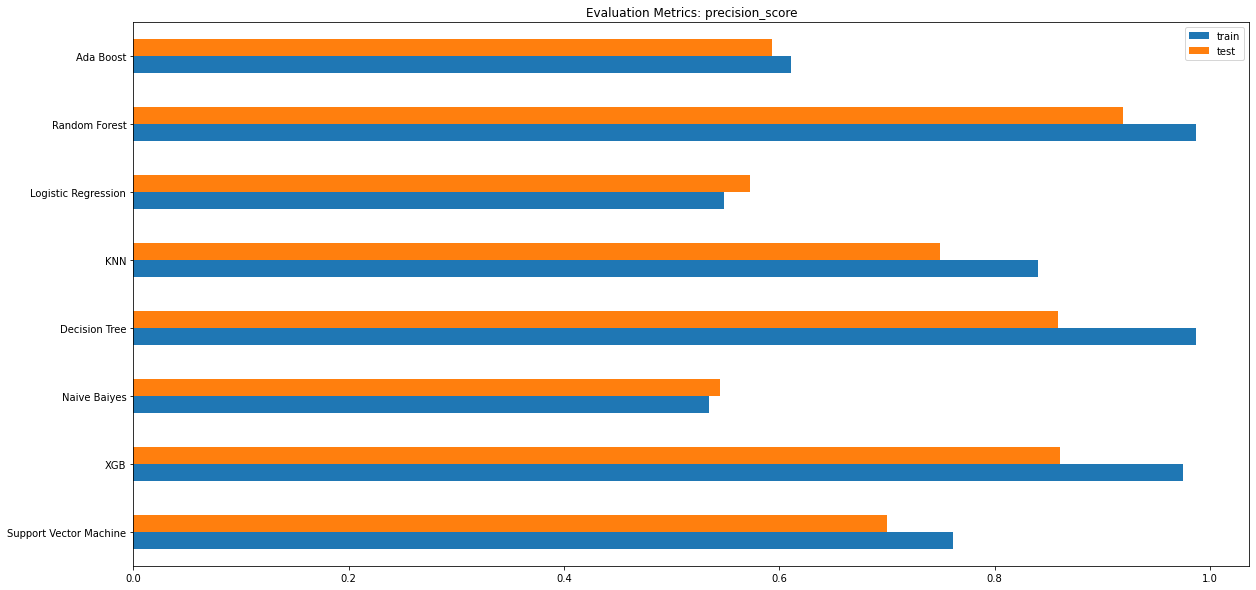

<Figure size 720x576 with 0 Axes>

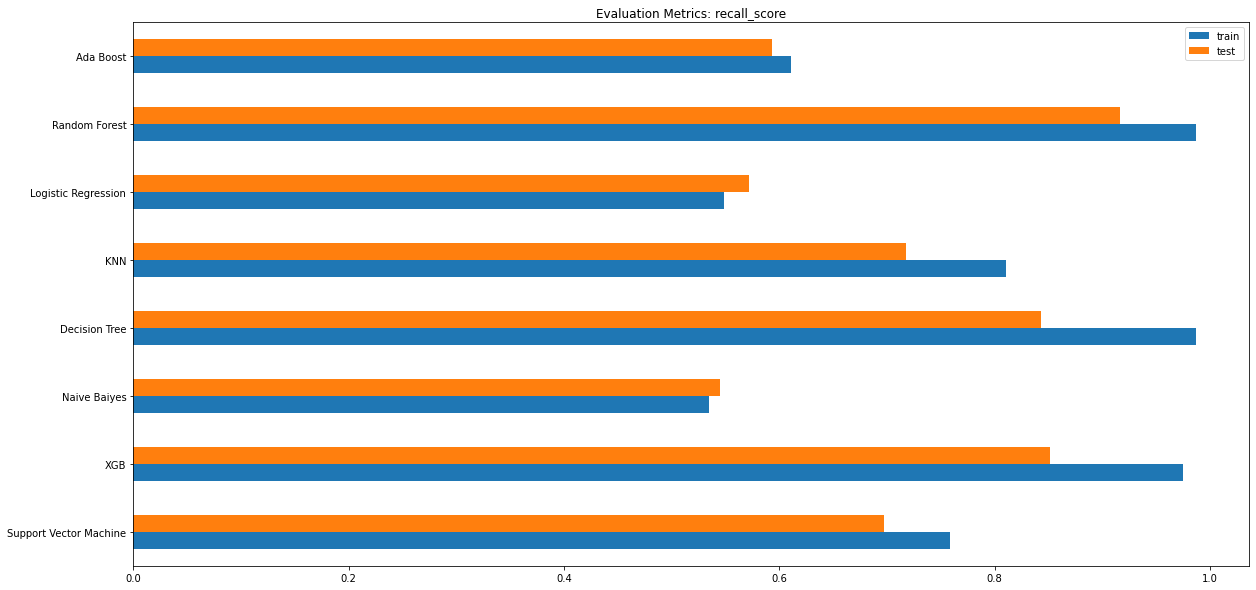

<Figure size 720x576 with 0 Axes>

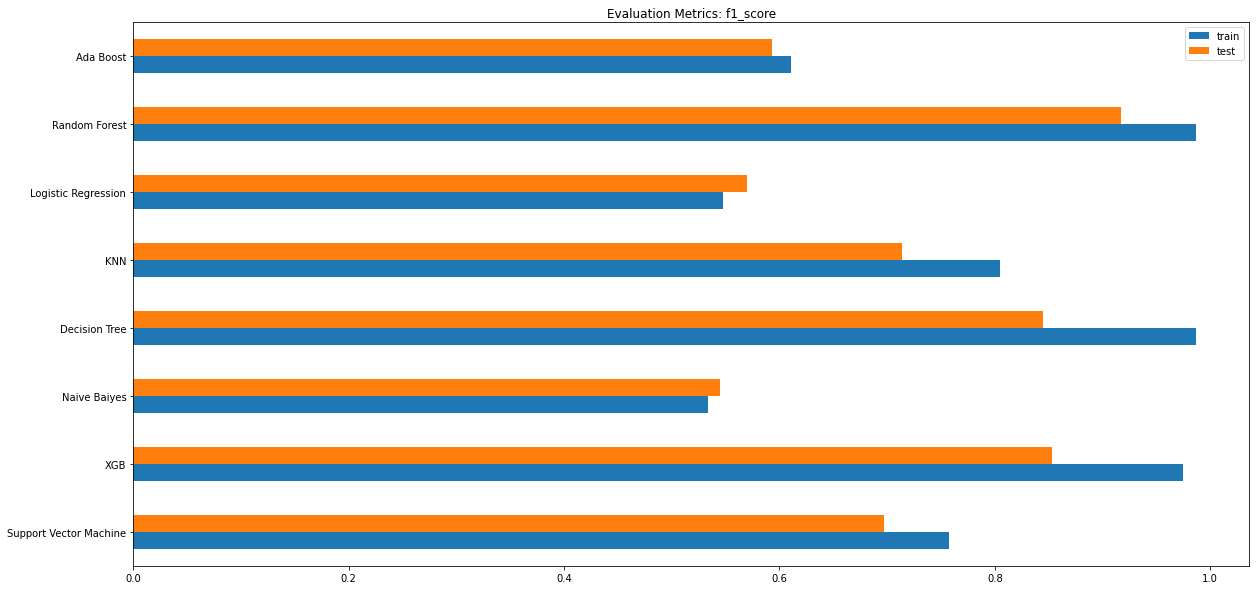

In [66]:
data_evaluation = {}
model_dict = {
    "Support Vector Machine": svm,
    "XGB": xgb,
    "Naive Baiyes": nb,
    "Decision Tree": dt,
    "KNN": knn,
    "Logistic Regression": lr,
    "Random Forest": rf,
    "Ada Boost": ab
}
metrics_method = {
    "accuracy_score": accuracy_score,
    "precision_score": precision_score,
    "recall_score": recall_score,
    "f1_score": f1_score,
}
metrics = ["accuracy_score", "precision_score", "recall_score", "f1_score"]
for metric in metrics:
    data_evaluation[metric] = pd.DataFrame(columns=['train', 'test'], index=[
                                                        "Support Vector Machine","XGB",
                                                        "Naive Baiyes", "Decision Tree","KNN",
                                                        "Logistic Regression", 
                                                        "Random Forest", 
                                                        "Ada Boost"])
    for model_name, model in model_dict.items():
        if metric == "accuracy_score":
            data_evaluation[metric].loc[model_name, 'train'] = metrics_method[metric](y_true=y_train, 
                                                    y_pred=model.predict(x_train))
            data_evaluation[metric].loc[model_name, 'test'] = metrics_method[metric](y_true=y_test, 
                                                    y_pred=model.predict(x_test))
        else:
            data_evaluation[metric].loc[model_name, 'train'] = metrics_method[metric](y_true=y_train, 
                                                    y_pred=model.predict(x_train), average="macro")
            data_evaluation[metric].loc[model_name, 'test'] = metrics_method[metric](y_true=y_test, 
                                                    y_pred=model.predict(x_test), average="macro")

for metric in data_evaluation.keys():
    plt.figure(figsize=(10, 8))
    data_evaluation[metric].plot(kind='barh', figsize=(20, 10))
    plt.title(f"Evaluation Metrics: {metric}")
    plt.show()
    
plt.show()

### Kita lihat dalam bentuk tabel hasil dari akurasi dari setiap model tersebut

In [67]:
data_evaluation["accuracy_score"]

,train,test
Support Vector Machine,0.758235,0.699531
XGB,0.974706,0.85446
Naive Baiyes,0.534118,0.546948
Decision Tree,0.987059,0.847418
KNN,0.808824,0.725352
Logistic Regression,0.548824,0.570423
Random Forest,0.987059,0.91784
Ada Boost,0.611176,0.593897


### Kita lihat dalam bentuk tabel hasil dari precision dari setiap model tersebut

In [68]:
data_evaluation["precision_score"]

,train,test
Support Vector Machine,0.761301,0.69964
XGB,0.974958,0.860799
Naive Baiyes,0.534471,0.545214
Decision Tree,0.987075,0.858458
KNN,0.840228,0.749468
Logistic Regression,0.548723,0.572435
Random Forest,0.987125,0.919081
Ada Boost,0.611251,0.593397


### Kita lihat dalam bentuk tabel hasil dari recall dari setiap model tersebut

In [69]:
data_evaluation["recall_score"]

,train,test
Support Vector Machine,0.758846,0.6971
XGB,0.974875,0.851267
Naive Baiyes,0.534399,0.544954
Decision Tree,0.98714,0.843215
KNN,0.810604,0.717345
Logistic Regression,0.548242,0.572235
Random Forest,0.987168,0.916665
Ada Boost,0.611254,0.593552


### Kita lihat dalam bentuk tabel hasil dari f1-score dari setiap model tersebut

In [70]:
data_evaluation["f1_score"]

,train,test
Support Vector Machine,0.757789,0.697369
XGB,0.974706,0.852743
Naive Baiyes,0.533973,0.544839
Decision Tree,0.987059,0.844831
KNN,0.804903,0.713399
Logistic Regression,0.54741,0.570363
Random Forest,0.987059,0.917458
Ada Boost,0.611176,0.593393


### Kita bandingkan hasil dari setiap model tersebut

In [71]:
prediksi = x_test.iloc[:5].copy()
pred_dict = {'y_true': y_test.iloc[:5].copy()}
for name, model in model_dict.items():
    pred_dict['Prediksi '+ name] = model.predict(prediksi).round(1)
    
pd.DataFrame(pred_dict)

,y_true,Prediksi Support Vector Machine,Prediksi XGB,Prediksi Naive Baiyes,Prediksi Decision Tree,Prediksi KNN,Prediksi Logistic Regression,Prediksi Random Forest,Prediksi Ada Boost
1770,1,1,1,1,1,1,1,1,1
1864,1,0,0,0,0,0,0,0,0
939,1,1,1,1,1,1,0,1,0
304,0,0,0,0,0,1,0,0,1
48,1,0,1,1,1,0,0,1,0


### Kita save model tersebut

In [72]:
# Buat direktori baru
import os
os.makedirs("saved_model/ver_dot_joblib")
os.makedirs("saved_model/ver_dot_model")

In [73]:
for model_name, model in model_dict.items():
    joblib.dump(model, f"saved_model/ver_dot_joblib/{model_name}.joblib")
    joblib.dump(model, f"saved_model/ver_dot_model/{model_name}.model")

In [74]:
from sklearn.ensemble import StackingClassifier

model_atas0 = list()
model_atas0.append(('xgb',XGBClassifier()))
model_atas0.append(('dt',DecisionTreeClassifier()))
model_atas0.append(('rf',RandomForestClassifier()))

model_atas1 = LogisticRegression()

model_stack = StackingClassifier(estimators=model_atas0, final_estimator=model_atas1, cv=13)
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=5, random_state=5)
scores = cross_val_score(model_stack, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1,  error_score='raise')

print(model_atas0)
print(scores)
print(np.mean(scores))

[('xgb', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)), ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier())]
[0.63380282 0.66197183 0.64788732 0.71830986 0.66197183 0.70422535
 0.63380282 0.67605634 0.67605634 0.52112676 0.57746479 0.70422535
 0.66197183 0.67605634 0.61971831 0.69014085 0.53521127 0.61971831
 0.73239437 0.66197183 0.63380282 